# Descriptive Analysis of Encounters, Arrests, and Removals

## Importing packages and datasets

In [3]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

In [4]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           #'compression': 'gzip',
           'encoding': 'utf-8'}

In [5]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)
with open('../hand/encounter_dtypes.yaml', 'r') as yamlfile:
        encounter_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [6]:
arrests = pd.read_csv('../input/arrests.csv', **csv_opts, dtype=arrest_dtypes)
encounters = pd.read_csv('../input/encounters.csv', **csv_opts, dtype=encounter_dtypes)
removals = pd.read_csv('../input/removals.csv', **csv_opts, dtype=removal_dtypes)

In [7]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')
encounters['event_date'] = pd.to_datetime(encounters['event_date'], format='%m/%d/%Y')
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

## Overview of data

In [8]:
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689378 entries, 0 to 1689377
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   aor                     1608957 non-null  category      
 1   event_date              1689378 non-null  datetime64[ns]
 2   landmark                1029394 non-null  category      
 3   operation               298737 non-null   category      
 4   processing_disposition  1686035 non-null  category      
 5   citizenship             1689378 non-null  category      
 6   gender                  1689360 non-null  category      
 7   id                      1689378 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 39.0 MB


In [9]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544059 entries, 0 to 544058
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   aor                     540251 non-null  category      
 1   apprehension_date       544059 non-null  datetime64[ns]
 2   apprehension_method     544059 non-null  category      
 3   apprehension_landmark   529216 non-null  category      
 4   operation               117368 non-null  category      
 5   processing_disposition  543865 non-null  category      
 6   citizenship             544059 non-null  category      
 7   gender                  544059 non-null  category      
 8   id                      544059 non-null  int64         
dtypes: category(7), datetime64[ns](1), int64(1)
memory usage: 13.3 MB


In [10]:
removals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963972 entries, 0 to 963971
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   aor                          963972 non-null  category      
 1   apprehension_date            949737 non-null  object        
 2   processing_disposition_code  958257 non-null  category      
 3   citizenship                  963972 non-null  category      
 4   gender                       963972 non-null  category      
 5   rc_threat_level              542478 non-null  object        
 6   final_charge_section         962328 non-null  category      
 7   departed_date                963972 non-null  datetime64[ns]
 8   removal_date                 963972 non-null  datetime64[ns]
 9   id                           963972 non-null  int64         
dtypes: category(5), datetime64[ns](2), int64(1), object(2)
memory usage: 42.3+ MB


In [6]:
encounters.head()

aor event_date                               landmark   operation  \
0  DEN 2015-10-01                      EAGLE COUNTY JAIL         NaN   
1  NaN 2015-10-01                                    NaN         NaN   
2  SFR 2015-10-01  TAFT FEDERAL CORRECTIONAL INSTITUTION  (B)(7)(E)    
3  LOS 2015-10-01         WSM GENERAL AREA, NON-SPECIFIC  (B)(7)(E)    
4  ATL 2015-10-01                                    NaN         NaN   

                    processing_disposition citizenship gender  id  
0                  Not Amenable to Removal      MEXICO   Male   0  
1        Notice to Appear Released (I-862)     ECUADOR   Male   1  
2  ADMINISTRATIVE DEPORTATION I-851/I-851A      MEXICO   Male   2  
3                                 Detainer      BELIZE   Male   3  
4                  Not Amenable to Removal     JAMAICA   Male   4

In [7]:
arrests.head()

aor apprehension_date        apprehension_method  \
0  SPM        2015-10-01       Probation and Parole   
1  CHI        2015-10-01       Non-Custodial Arrest   
2  LOS        2015-10-01    CAP State Incarceration   
3  HOU        2015-10-01    CAP State Incarceration   
4  SNA        2015-10-01  CAP Federal Incarceration   

                       apprehension_landmark operation  \
0               OMAHA NE NON-FUGITIVE ARREST       NaN   
1             CHI GENERAL AREA, NON-SPECIFIC       NaN   
2                CALIFORNIA MENS COLONY WEST       NaN   
3  TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO       NaN   
4          HOUSTON ERO CONTRACT DET FACILITY       NaN   

                processing_disposition citizenship gender  id  
0  REINSTATEMENT OF DEPORT ORDER I-871      MEXICO   Male   0  
1                      Bag and Baggage   GUATEMALA   Male   1  
2                                Other        LAOS   Male   2  
3  REINSTATEMENT OF DEPORT ORDER I-871      MEXICO   Male   3  
4                                Other      MEXICO   Male   4

In [8]:
removals.head()

aor apprehension_date processing_disposition_code citizenship gender  \
0  NOL         8/26/2015                      ADMDPT   GUATEMALA   Male   
1  DAL               NaN                      REINST      MEXICO   Male   
2  DAL         6/19/2015                      REINST      MEXICO   Male   
3  SNA         8/21/2015                      REINST    HONDURAS   Male   
4  HOU         9/28/2015                      REINST      MEXICO   Male   

  rc_threat_level final_charge_section departed_date removal_date  id  
0      (B)(7)(E)             237a2Aiii    2015-10-01   2015-10-01   0  
1      (B)(7)(E)              212a9Aii    2015-10-01   2015-10-01   1  
2      (B)(7)(E)             212a9CiII    2015-10-01   2015-10-01   2  
3      (B)(7)(E)              212a9Aii    2015-10-01   2015-10-01   3  
4      (B)(7)(E)             212a9CiII    2015-10-01   2015-10-01   4

In [122]:
arrests["year"] = arrests["apprehension_date"].dt.strftime('%Y')
arrests["month"] = arrests["apprehension_date"].dt.strftime('%m')

In [146]:
arrests.set_index('apprehension_date').groupby(pd.Grouper(freq='MS'))['id'].count()

apprehension_date
2015-10-01    10242
2015-11-01     8544
2015-12-01     8778
2016-01-01     8046
2016-02-01     8756
2016-03-01     9669
2016-04-01     9457
2016-05-01     9652
2016-06-01     9103
2016-07-01     8436
2016-08-01    10115
2016-09-01     9306
2016-10-01     9397
2016-11-01     9015
2016-12-01     8998
2017-01-01     9575
2017-02-01    11554
2017-03-01    14084
2017-04-01    12372
2017-05-01    13527
2017-06-01    13972
2017-07-01    13567
2017-08-01    14364
2017-09-01    13045
2017-10-01    14006
2017-11-01    13177
2017-12-01    12307
2018-01-01    13167
2018-02-01    13236
2018-03-01    13737
2018-04-01    13324
2018-05-01    14280
2018-06-01    13315
2018-07-01    12578
2018-08-01    13718
2018-09-01    11736
2018-10-01    12378
2018-11-01    11693
2018-12-01    11216
2019-01-01    12491
2019-02-01    12381
2019-03-01    12136
2019-04-01    12151
2019-05-01    13073
2019-06-01    11208
2019-07-01    11714
2019-08-01    11459
2019-09-01        4
Freq: MS, Name: id, dt

## Null values

In [9]:
# table for encounters
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', "{:,}".format(sum(pd.isnull(encounters.aor))), str(round(sum(pd.isnull(encounters.aor)) / len(encounters) * 100, 2)) +'%'], 
              ['Event Date', "{:,}".format(sum(pd.isnull(encounters.event_date))), str(round(sum(pd.isnull(encounters.event_date)) / len(encounters) * 100, 2)) +'%'],
              ['Landmark', "{:,}".format(sum(pd.isnull(encounters.landmark))), str(round(sum(pd.isnull(encounters.landmark)) / len(encounters) * 100, 2)) +'%'],
              ['Operation', "{:,}".format(sum(pd.isnull(encounters.operation))), str(round(sum(pd.isnull(encounters.operation)) / len(encounters) * 100, 2)) +'%'],
              ['Processing Disposition', "{:,}".format(sum(pd.isnull(encounters.processing_disposition))), str(round(sum(pd.isnull(encounters.processing_disposition)) / len(encounters) * 100, 2)) +'%'],
              ['Citizenship', "{:,}".format(sum(pd.isnull(encounters.citizenship))), str(round(sum(pd.isnull(encounters.citizenship)) / len(encounters) * 100, 2)) +'%'],
              ['Gender', "{:,}".format(sum(pd.isnull(encounters.gender))), str(round(sum(pd.isnull(encounters.gender)) / len(encounters) * 100, 2)) +'%']
             ]


print('Null values for Encounters data (total = 1,689,378)')
print(tabulate(null_table, headers='firstrow', tablefmt='fancy_grid', stralign='center', numalign='center'))

# table for arrests
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', "{:,}".format(sum(pd.isnull(arrests.aor))), str(round(sum(pd.isnull(arrests.aor)) / len(arrests) * 100, 2)) +'%'], 
              ['Apprehension Date', "{:,}".format(sum(pd.isnull(arrests.apprehension_date))), str(round(sum(pd.isnull(arrests.apprehension_date)) / len(arrests) * 100, 2)) +'%'], 
              ['Apprehension Method', "{:,}".format(sum(pd.isnull(arrests.apprehension_method))), str(round(sum(pd.isnull(arrests.apprehension_method)) / len(arrests) * 100, 2)) +'%'], 
              ['Operation', "{:,}".format(sum(pd.isnull(arrests.operation))), str(round(sum(pd.isnull(arrests.operation)) / len(arrests) * 100, 2)) +'%'],
              ['Apprehension Landmark', "{:,}".format(sum(pd.isnull(arrests.apprehension_landmark))), str(round(sum(pd.isnull(arrests.apprehension_landmark)) / len(arrests) * 100, 2)) +'%'], 
              ['Processing Disposition', "{:,}".format(sum(pd.isnull(arrests.processing_disposition))), str(round(sum(pd.isnull(arrests.processing_disposition)) / len(arrests) * 100, 2)) +'%'], 
              ['Citizenship', "{:,}".format(sum(pd.isnull(arrests.citizenship))), str(round(sum(pd.isnull(arrests.citizenship)) / len(arrests) * 100, 2)) +'%'],
              ['Gender', "{:,}".format(sum(pd.isnull(arrests.gender))), str(round(sum(pd.isnull(arrests.gender)) / len(arrests) * 100, 2)) +'%']
             ]

print('')
print('Null values for Arrests data (total = 544,059)')
print(tabulate(null_table, headers='firstrow', tablefmt='fancy_grid', stralign='center', numalign='center'))

# table for removals
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', "{:,}".format(sum(pd.isnull(removals.aor))), str(round(sum(pd.isnull(removals.aor)) / len(removals) * 100, 2)) +'%'], 
              ['Apprehension Date', "{:,}".format(sum(pd.isnull(removals.apprehension_date))), str(round(sum(pd.isnull(removals.apprehension_date)) / len(removals) * 100, 2)) +'%'], 
              ['Processing Disposition Code', "{:,}".format(sum(pd.isnull(removals.processing_disposition_code))), str(round(sum(pd.isnull(removals.processing_disposition_code)) / len(removals) * 100, 2)) +'%'], 
              ['Citizenship', "{:,}".format(sum(pd.isnull(removals.citizenship))), str(round(sum(pd.isnull(removals.citizenship)) / len(removals) * 100, 2)) +'%'],
              ['Gender', "{:,}".format(sum(pd.isnull(removals.gender))), str(round(sum(pd.isnull(removals.gender)) / len(removals) * 100, 2)) +'%'],
              ['RC Threat Level', "{:,}".format(sum(pd.isnull(removals.rc_threat_level))), str(round(sum(pd.isnull(removals.rc_threat_level)) / len(removals) * 100, 2)) +'%'],
              ['Final Charge Section', "{:,}".format(sum(pd.isnull(removals.final_charge_section))), str(round(sum(pd.isnull(removals.final_charge_section)) / len(removals) * 100, 2)) +'%'],
              ['Departed Date', "{:,}".format(sum(pd.isnull(removals.departed_date))), str(round(sum(pd.isnull(removals.departed_date)) / len(removals) * 100, 2)) +'%'],
              ['Removal Date', "{:,}".format(sum(pd.isnull(removals.removal_date))), str(round(sum(pd.isnull(removals.removal_date)) / len(removals) * 100, 2)) +'%'],
             ]


print('')
print('Null values for Removals data (total = 963,972)')
print(tabulate(null_table, headers='firstrow', tablefmt='fancy_grid', stralign='center', numalign='center'))

Null values for Encounters data (total = 1,689,378)
╒════════════════════════╤═══════════╤═════════╕
│        Variable        │    NaN    │  % Nan  │
╞════════════════════════╪═══════════╪═════════╡
│          AOR           │  80,421   │  4.76%  │
├────────────────────────┼───────────┼─────────┤
│       Event Date       │     0     │  0.0%   │
├────────────────────────┼───────────┼─────────┤
│        Landmark        │  659,984  │ 39.07%  │
├────────────────────────┼───────────┼─────────┤
│       Operation        │ 1,390,641 │ 82.32%  │
├────────────────────────┼───────────┼─────────┤
│ Processing Disposition │   3,343   │  0.2%   │
├────────────────────────┼───────────┼─────────┤
│      Citizenship       │     0     │  0.0%   │
├────────────────────────┼───────────┼─────────┤
│         Gender         │    18     │  0.0%   │
╘════════════════════════╧═══════════╧═════════╛

Null values for Arrests data (total = 544,059)
╒════════════════════════╤═════════╤═════════╕
│        Variable   

## Enforcement Counts by AOR over time

### Encounters

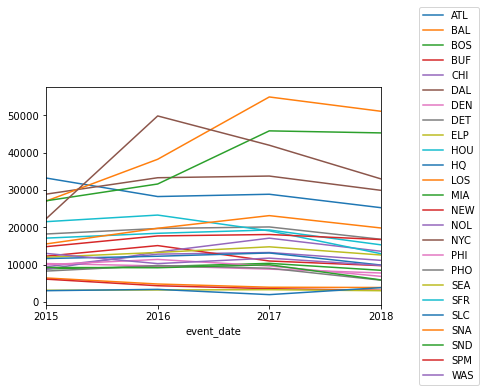

In [10]:
encounters_by_fy = encounters[["aor", "event_date", "id"]]
encounters_by_fy = encounters_by_fy.groupby(["aor", "event_date"], as_index=False)['id'].count()
encounters_by_fy = encounters_by_fy.pivot(index='event_date', columns='aor', values='id')
encounters_by_fy = encounters_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()
encounters_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
encounters_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

### Arrests

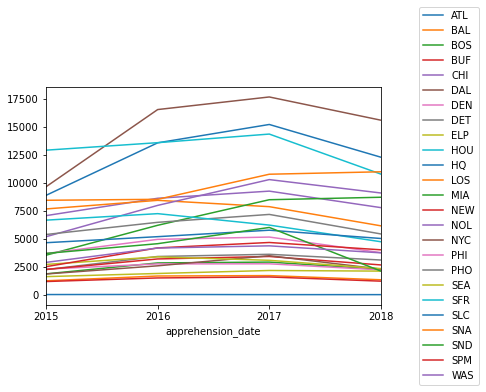

In [11]:
arrests_by_fy = arrests[["aor", "apprehension_date", "id"]]
arrests_by_fy = arrests_by_fy.groupby(["aor", "apprehension_date"], as_index=False)['id'].count()
arrests_by_fy = arrests_by_fy.pivot(index='apprehension_date', columns='aor', values='id')
arrests_by_fy = arrests_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()
arrests_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
arrests_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

### Removals

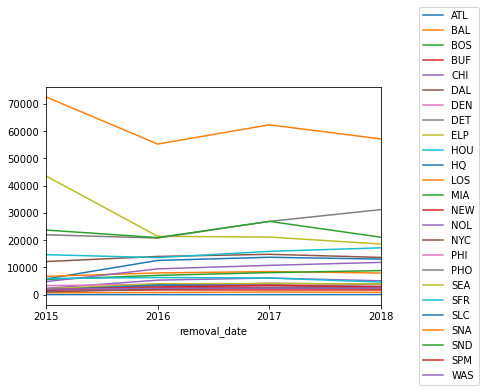

In [12]:
removals_by_fy = removals[["aor", "removal_date", "id"]]
removals_by_fy = removals_by_fy.groupby(["aor", "removal_date"], as_index=False)['id'].count()
removals_by_fy = removals_by_fy.pivot(index='removal_date', columns='aor', values='id')
removals_by_fy = removals_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()
removals_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
removals_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

## Arrest methods by AOR over time (unfinished)

apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
287(g) Program                                     1468        4242   
Anti-Smuggling                                        1           1   
Boat Patrol                                           4           0   
CAP Federal Incarceration                          2278        1593   
CAP Local Incarceration                            1843        4345   
CAP State Incarceration                             312         179   
Crewman/Stowaway                                      0           0   
Criminal Alien Program                                0           0   
ERO Reprocessed Arrest                               31          42   
Inspections                                           1           0   
Law Enforcement Agency Response Unit                 12           4   
Located                                            1546        1036   
Non-Custodial Arrest                                730        1587   
Organized Crime Drug Enforcement Task Force           1           1   
Other Agency (turned over to INS)                     5           5   
Other Task Force                                     17          14   
Other efforts                                       127          51   
Patrol Border                                         2           1   
Patrol Interior                                       1           0   
Probation and Parole                                484         446   
Worksite Enforcement                                  3           0   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           4   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
287(g) Program                                     5641        4102  
Anti-Smuggling                                        1           0  
Boat Patrol                                           3           0  
CAP Federal Incarceration                          1674        1357  
CAP Local Incarceration                            4687        4071  
CAP State Incarceration                             231         165  
Crewman/Stowaway                                      0           0  
Criminal Alien Program                                0           0  
ERO Reprocessed Arrest                               43          38  
Inspections                                           1           3  
Law Enforcement Agency Response Unit                  4           3  
Located                                            1096         789  
Non-Custodial Arrest                               1430        1535  
Organized Crime Drug Enforcement Task Force           0           0  
Other Agency (turned over to INS)                     5           5  
Other Task Force                                      2           0  
Other efforts                                        42          17  
Patrol Border                                         0           3  
Patrol Interior                                       0           0  
Probation and Parole                                319         176  
Worksite Enforcement                                  0           0  
Traffic Check                                         0           0  
Transportation Check Aircraft                        10           4  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  0           0

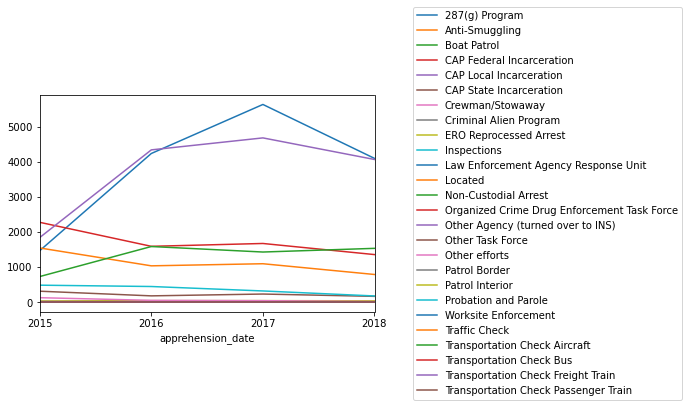

In [8]:
arrests_by_method = arrests[["aor", "apprehension_date", "apprehension_method", "id"]]
arrests_by_method = arrests_by_method.groupby(["aor", "apprehension_date", "apprehension_method"], as_index=False)['id'].count()
arrests_by_method_aor = arrests_by_method.loc[arrests_by_method["aor"] == "ATL"]
arrests_by_method_aor = arrests_by_method_aor.pivot(index='apprehension_date', columns='apprehension_method', values='id')
arrests_by_method_aor = arrests_by_method_aor.groupby(pd.Grouper(freq='AS-OCT')).sum()
arrests_by_method_aor.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
#arrests_by_fy.T.style.format("{:,.0f}")

arrests_by_method_aor.transpose()

In [9]:
arrests_by_method = arrests[["aor", "apprehension_date", "apprehension_method", "id"]]
arrests_by_method = arrests_by_method.groupby(["aor", "apprehension_date", "apprehension_method"], as_index=False)['id'].count()

foo = set(arrests['aor'])
foo.remove(np.nan)

for i in foo:
    arrests_by_method_aor = arrests_by_method.loc[arrests_by_method["aor"] == i]
    arrests_by_method_aor = arrests_by_method_aor.pivot(index='apprehension_date', columns='apprehension_method', values='id')
    arrests_by_method_aor = arrests_by_method_aor.groupby(pd.Grouper(freq='AS-OCT')).sum()
    #arrests_by_method_aor.plot(label= i).legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
    arrests_by_method_aor = arrests_by_method_aor.transpose()
    print(i)
    arrests_by_method_aor = arrests_by_method_aor.sort_values(by=[arrests_by_method_aor.columns[3]], ascending=False)
    display(arrests_by_method_aor)

PHO


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            3639        3730   
Non-Custodial Arrest                                316         703   
Law Enforcement Agency Response Unit                252         384   
ERO Reprocessed Arrest                              227         495   
CAP State Incarceration                             545         705   
Located                                              96         148   
CAP Federal Incarceration                           139         127   
Other efforts                                        29          46   
Probation and Parole                                 70          66   
287(g) Program                                       23          25   
Other Task Force                                      9           7   
Other Agency (turned over to INS)                    12           9   
Boat Patrol                                           0           0   
Traffic Check                                         1           0   
Worksite Enforcement                                  0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Anti-Smuggling                                        2           3   
Patrol Border                                         4           5   
Patrol Interior                                       2           1   
Inspections                                           2           1   
Criminal Alien Program                                1           2   
Crewman/Stowaway                                      1           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            3960        3165  
Non-Custodial Arrest                                835         853  
Law Enforcement Agency Response Unit                785         427  
ERO Reprocessed Arrest                              447         325  
CAP State Incarceration                             575         266  
Located                                             233         155  
CAP Federal Incarceration                           162         101  
Other efforts                                        37          58  
Probation and Parole                                 48          32  
287(g) Program                                       11          15  
Other Task Force                                     15           7  
Other Agency (turned over to INS)                    30           5  
Boat Patrol                                           0           4  
Traffic Check                                         1           4  
Worksite Enforcement                                  1           2  
Organized Crime Drug Enforcement Task Force           0           1  
Anti-Smuggling                                       11           0  
Patrol Border                                         9           0  
Patrol Interior                                       0           0  
Inspections                                           1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      1           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  0           0

MIA


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                             513        1193   
Located                                             685        1494   
CAP State Incarceration                             600         970   
287(g) Program                                      185         641   
Non-Custodial Arrest                                650         589   
CAP Federal Incarceration                           214         305   
Other efforts                                        65         131   
Probation and Parole                                491         594   
ERO Reprocessed Arrest                               58          56   
Other Agency (turned over to INS)                     9          13   
Law Enforcement Agency Response Unit                  2           3   
Organized Crime Drug Enforcement Task Force          39         190   
Worksite Enforcement                                  1           1   
Inspections                                           0           0   
Other Task Force                                      6           5   
Patrol Border                                         1           1   
Crewman/Stowaway                                      0           0   
Anti-Smuggling                                        1           3   
Criminal Alien Program                                0           2   
Patrol Interior                                       0           0   
Boat Patrol                                           4           0   
Traffic Check                                         0           1   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            2754        3157  
Located                                            1341        1700  
CAP State Incarceration                            1613        1503  
287(g) Program                                     1120        1084  
Non-Custodial Arrest                                535         367  
CAP Federal Incarceration                           249         300  
Other efforts                                       137         217  
Probation and Parole                                552         202  
ERO Reprocessed Arrest                              116         118  
Other Agency (turned over to INS)                    13          15  
Law Enforcement Agency Response Unit                  7          11  
Organized Crime Drug Enforcement Task Force           7           6  
Worksite Enforcement                                  5           5  
Inspections                                          11           3  
Other Task Force                                      8           3  
Patrol Border                                         1           3  
Crewman/Stowaway                                      0           1  
Anti-Smuggling                                        1           0  
Criminal Alien Program                                0           0  
Patrol Interior                                       3           0  
Boat Patrol                                           1           0  
Traffic Check                                         0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  0           0

WAS


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                             910        1766   
287(g) Program                                      462         578   
Located                                             297         559   
CAP Federal Incarceration                           572         597   
Non-Custodial Arrest                                382         423   
CAP State Incarceration                              97          98   
ERO Reprocessed Arrest                               17          18   
Other efforts                                        12          33   
Probation and Parole                                120          79   
Other Agency (turned over to INS)                    10           7   
Law Enforcement Agency Response Unit                  0           1   
Worksite Enforcement                                  0           1   
Patrol Border                                         0           0   
Patrol Interior                                       0           0   
Transportation Check Aircraft                         1           1   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Other Task Force                                      1           0   
Anti-Smuggling                                        0           0   
Inspections                                           1           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      1           2   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            2240        1944  
287(g) Program                                      631         571  
Located                                             379         372  
CAP Federal Incarceration                           683         351  
Non-Custodial Arrest                                260         315  
CAP State Incarceration                              54          88  
ERO Reprocessed Arrest                               19          38  
Other efforts                                        26          25  
Probation and Parole                                 49          12  
Other Agency (turned over to INS)                     6           7  
Law Enforcement Agency Response Unit                  9           6  
Worksite Enforcement                                  0           4  
Patrol Border                                         0           1  
Patrol Interior                                       0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         1           0  
Organized Crime Drug Enforcement Task Force           0           0  
Other Task Force                                      0           0  
Anti-Smuggling                                        0           0  
Inspections                                           1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           1           0  
Transportation Check Passenger Train                  0           0

BUF


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP State Incarceration                             661         693   
Non-Custodial Arrest                                 84         131   
Located                                             134         283   
CAP Local Incarceration                             111         184   
CAP Federal Incarceration                           107          67   
Probation and Parole                                 21          22   
Worksite Enforcement                                  0          11   
287(g) Program                                        0           0   
ERO Reprocessed Arrest                                0           1   
Other efforts                                        23          66   
Transportation Check Freight Train                    0           0   
Transportation Check Bus                              0           0   
Transportation Check Aircraft                         0           0   
Traffic Check                                         0           0   
Patrol Interior                                       0           0   
Patrol Border                                         8           4   
Organized Crime Drug Enforcement Task Force           0           0   
Other Task Force                                      2           4   
Other Agency (turned over to INS)                    11          20   
Anti-Smuggling                                        0           0   
Law Enforcement Agency Response Unit                  9           6   
Inspections                                           2           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           1   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP State Incarceration                             677         645  
Non-Custodial Arrest                                330         335  
Located                                             276          91  
CAP Local Incarceration                             118          58  
CAP Federal Incarceration                            50          47  
Probation and Parole                                 20          15  
Worksite Enforcement                                  2           7  
287(g) Program                                        1           3  
ERO Reprocessed Arrest                                1           3  
Other efforts                                        63           2  
Transportation Check Freight Train                    0           0  
Transportation Check Bus                              0           0  
Transportation Check Aircraft                         0           0  
Traffic Check                                         4           0  
Patrol Interior                                       0           0  
Patrol Border                                         4           0  
Organized Crime Drug Enforcement Task Force           0           0  
Other Task Force                                      1           0  
Other Agency (turned over to INS)                    29           0  
Anti-Smuggling                                        0           0  
Law Enforcement Agency Response Unit                  4           0  
Inspections                                           2           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

PHI


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Non-Custodial Arrest                                618        1776   
CAP Federal Incarceration                          1773        1423   
CAP Local Incarceration                             527         753   
Located                                             300         497   
CAP State Incarceration                             239         255   
Probation and Parole                                143         131   
ERO Reprocessed Arrest                               45          62   
Other efforts                                        13          19   
Other Agency (turned over to INS)                     7          10   
Law Enforcement Agency Response Unit                  4           7   
287(g) Program                                        0           1   
Patrol Interior                                       0           0   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Worksite Enforcement                                  0           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Border                                         1           2   
Other Task Force                                      0           1   
Anti-Smuggling                                        0           1   
Inspections                                           1           0   
Criminal Alien Program                                1           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Non-Custodial Arrest                               1930        1157  
CAP Federal Incarceration                          1336        1150  
CAP Local Incarceration                             780         638  
Located                                             538         349  
CAP State Incarceration                             322         290  
Probation and Parole                                130          89  
ERO Reprocessed Arrest                               67          62  
Other efforts                                         6           9  
Other Agency (turned over to INS)                    20           4  
Law Enforcement Agency Response Unit                 11           3  
287(g) Program                                        0           1  
Patrol Interior                                       0           0  
Traffic Check                                         0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Worksite Enforcement                                  0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Border                                         0           0  
Other Task Force                                      0           0  
Anti-Smuggling                                        2           0  
Inspections                                           1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

BAL


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Non-Custodial Arrest                                380         513   
CAP Local Incarceration                             230         326   
Located                                             153         379   
287(g) Program                                       14          67   
Probation and Parole                                283         254   
CAP State Incarceration                              67          56   
CAP Federal Incarceration                            44          27   
ERO Reprocessed Arrest                                8          11   
Other efforts                                        49          22   
Law Enforcement Agency Response Unit                  2           5   
Other Agency (turned over to INS)                     3           5   
Patrol Interior                                       0           0   
Worksite Enforcement                                  0           0   
Other Task Force                                      5           0   
Transportation Check Bus                              0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Border                                         0           1   
Anti-Smuggling                                        0           0   
Inspections                                           1           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Non-Custodial Arrest                                361         376  
CAP Local Incarceration                             482         370  
Located                                             522         249  
287(g) Program                                       96         103  
Probation and Parole                                 99         103  
CAP State Incarceration                              71          47  
CAP Federal Incarceration                            37          35  
ERO Reprocessed Arrest                                9          15  
Other efforts                                        19          15  
Law Enforcement Agency Response Unit                  5           7  
Other Agency (turned over to INS)                     2           7  
Patrol Interior                                       0           1  
Worksite Enforcement                                  0           1  
Other Task Force                                      0           1  
Transportation Check Bus                              0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Border                                         0           0  
Anti-Smuggling                                        0           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

SPM


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            1079        2217   
Non-Custodial Arrest                                385         741   
Located                                             355         408   
CAP State Incarceration                             180         176   
CAP Federal Incarceration                           135         145   
Probation and Parole                                201         136   
ERO Reprocessed Arrest                               10          14   
Other efforts                                        25          69   
287(g) Program                                        0           0   
Worksite Enforcement                                  3           0   
Other Agency (turned over to INS)                   121         258   
Patrol Border                                         0           0   
Traffic Check                                         0           1   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Patrol Interior                                       1           0   
Organized Crime Drug Enforcement Task Force           1           0   
Other Task Force                                      3           3   
Anti-Smuggling                                        1           4   
Law Enforcement Agency Response Unit                  0           2   
Inspections                                           0           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            2908        2380  
Non-Custodial Arrest                                821         892  
Located                                             407         293  
CAP State Incarceration                             189         173  
CAP Federal Incarceration                           163         151  
Probation and Parole                                115          55  
ERO Reprocessed Arrest                               12          24  
Other efforts                                        11          14  
287(g) Program                                        6          11  
Worksite Enforcement                                 17           7  
Other Agency (turned over to INS)                     3           4  
Patrol Border                                         0           1  
Traffic Check                                         1           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Patrol Interior                                       0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Other Task Force                                      0           0  
Anti-Smuggling                                        4           0  
Law Enforcement Agency Response Unit                  1           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

CHI


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            2316        3462   
Non-Custodial Arrest                               1536        2081   
Located                                            1033        1188   
ERO Reprocessed Arrest                              580         377   
CAP State Incarceration                             865         745   
CAP Federal Incarceration                           280         279   
Probation and Parole                                313         342   
Other efforts                                        48          79   
Other Agency (turned over to INS)                    45          26   
Patrol Interior                                       8           1   
Worksite Enforcement                                  0           0   
Other Task Force                                      1           5   
Inspections                                           0           1   
Law Enforcement Agency Response Unit                 27           9   
Patrol Border                                         1           0   
Anti-Smuggling                                        0           8   
Crewman/Stowaway                                      1           0   
287(g) Program                                        1           0   
Organized Crime Drug Enforcement Task Force           0           0   
Boat Patrol                                           0           1   
Criminal Alien Program                                0           0   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            3825        3281  
Non-Custodial Arrest                               2044        1412  
Located                                            1106         898  
ERO Reprocessed Arrest                              723         775  
CAP State Incarceration                             749         632  
CAP Federal Incarceration                           363         446  
Probation and Parole                                303         197  
Other efforts                                        66          48  
Other Agency (turned over to INS)                    32          23  
Patrol Interior                                       2          14  
Worksite Enforcement                                  7          12  
Other Task Force                                      5          10  
Inspections                                           1           6  
Law Enforcement Agency Response Unit                  5           6  
Patrol Border                                         0           2  
Anti-Smuggling                                        3           2  
Crewman/Stowaway                                      2           2  
287(g) Program                                        0           1  
Organized Crime Drug Enforcement Task Force           0           1  
Boat Patrol                                           0           1  
Criminal Alien Program                                0           0  
Traffic Check                                         4           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  1           0

NEW


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Non-Custodial Arrest                                788         902   
Located                                             265         501   
CAP Local Incarceration                             747        1179   
CAP State Incarceration                             250         222   
287(g) Program                                       29         127   
CAP Federal Incarceration                           113         107   
Probation and Parole                                 37         124   
ERO Reprocessed Arrest                               10           7   
Worksite Enforcement                                  0           0   
Other efforts                                         5           5   
Law Enforcement Agency Response Unit                  0          12   
Other Agency (turned over to INS)                     1           2   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Border                                         0           0   
Anti-Smuggling                                        0           0   
Inspections                                           0           0   
Other Task Force                                      2           1   
Criminal Alien Program                                0           0   
Patrol Interior                                       0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Non-Custodial Arrest                                923         916  
Located                                             635         612  
CAP Local Incarceration                            1263         600  
CAP State Incarceration                             180         263  
287(g) Program                                      113         120  
CAP Federal Incarceration                           173          87  
Probation and Parole                                 89          29  
ERO Reprocessed Arrest                                4           9  
Worksite Enforcement                                  0           4  
Other efforts                                         7           4  
Law Enforcement Agency Response Unit                 18           4  
Other Agency (turned over to INS)                     1           3  
Organized Crime Drug Enforcement Task Force           0           2  
Patrol Border                                         1           1  
Anti-Smuggling                                        0           0  
Inspections                                           1           0  
Other Task Force                                      1           0  
Criminal Alien Program                                0           0  
Patrol Interior                                       0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Traffic Check                                         0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  0           0

SND


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Non-Custodial Arrest                                431        1011   
Located                                              86         187   
CAP Local Incarceration                             747        1247   
CAP State Incarceration                             342         286   
CAP Federal Incarceration                           892         842   
ERO Reprocessed Arrest                              902         348   
Probation and Parole                                225         112   
Patrol Border                                        11          90   
Other efforts                                         5         332   
Other Agency (turned over to INS)                     6          32   
Inspections                                          29          25   
Other Task Force                                      6          17   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Worksite Enforcement                                  1           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           1   
287(g) Program                                        0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Interior                                       0           0   
Anti-Smuggling                                        0           8   
Law Enforcement Agency Response Unit                  0           9   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           2   
Boat Patrol                                           0           2   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Non-Custodial Arrest                                881        1018  
Located                                             877         437  
CAP Local Incarceration                             848         218  
CAP State Incarceration                             247         173  
CAP Federal Incarceration                           825         143  
ERO Reprocessed Arrest                             1953          85  
Probation and Parole                                 51          17  
Patrol Border                                        35           5  
Other efforts                                       199           5  
Other Agency (turned over to INS)                     5           3  
Inspections                                          60           2  
Other Task Force                                      9           1  
Traffic Check                                         1           0  
Transportation Check Aircraft                         0           0  
Worksite Enforcement                                  0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
287(g) Program                                        1           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Anti-Smuggling                                        4           0  
Law Enforcement Agency Response Unit                  4           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

DET


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                             976        1395   
Non-Custodial Arrest                                636        1166   
Located                                             121         289   
287(g) Program                                        3           1   
CAP State Incarceration                              91          79   
Other efforts                                        85         157   
CAP Federal Incarceration                            54         105   
Probation and Parole                                185         147   
ERO Reprocessed Arrest                               72          57   
Worksite Enforcement                                  0           0   
Law Enforcement Agency Response Unit                  0           3   
Traffic Check                                         0           0   
Other Agency (turned over to INS)                    13           8   
Inspections                                           0           0   
Patrol Border                                         0           1   
Transportation Check Aircraft                         0           1   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           1           0   
Patrol Interior                                       0           0   
Other Task Force                                      4           0   
Anti-Smuggling                                        0           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            1547        1238  
Non-Custodial Arrest                               1362        1231  
Located                                             294         237  
287(g) Program                                       56         116  
CAP State Incarceration                              58          70  
Other efforts                                        90          65  
CAP Federal Incarceration                            52          57  
Probation and Parole                                 97          53  
ERO Reprocessed Arrest                               35          16  
Worksite Enforcement                                  0           5  
Law Enforcement Agency Response Unit                  0           2  
Traffic Check                                         0           1  
Other Agency (turned over to INS)                    12           1  
Inspections                                           0           1  
Patrol Border                                         0           1  
Transportation Check Aircraft                         1           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Other Task Force                                      0           0  
Anti-Smuggling                                        0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

DAL


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            3319        6961   
CAP Federal Incarceration                          3164        6634   
Non-Custodial Arrest                                427         395   
287(g) Program                                      355         375   
Located                                            1508        1381   
Probation and Parole                                589         585   
CAP State Incarceration                             142          47   
ERO Reprocessed Arrest                               13          13   
Other efforts                                        79          70   
Organized Crime Drug Enforcement Task Force           2           1   
Criminal Alien Program                                0           0   
Anti-Smuggling                                        0           6   
Other Task Force                                      2           4   
Law Enforcement Agency Response Unit                 29          22   
Inspections                                           0           0   
Other Agency (turned over to INS)                     3          17   
Crewman/Stowaway                                      1           3   
Patrol Border                                         1           1   
Patrol Interior                                       0           2   
Boat Patrol                                           0           0   
Worksite Enforcement                                  0           0   
Traffic Check                                         0           1   
Transportation Check Aircraft                         0           2   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            8115        7160  
CAP Federal Incarceration                          7303        6269  
Non-Custodial Arrest                                329         890  
287(g) Program                                      490         460  
Located                                             898         317  
Probation and Parole                                311         296  
CAP State Incarceration                              95         102  
ERO Reprocessed Arrest                               18          41  
Other efforts                                        46          31  
Organized Crime Drug Enforcement Task Force           0           2  
Criminal Alien Program                                0           1  
Anti-Smuggling                                        1           1  
Other Task Force                                      3           1  
Law Enforcement Agency Response Unit                  7           0  
Inspections                                           0           0  
Other Agency (turned over to INS)                     4           0  
Crewman/Stowaway                                      1           0  
Patrol Border                                         0           0  
Patrol Interior                                       0           0  
Boat Patrol                                           0           0  
Worksite Enforcement                                 16           0  
Traffic Check                                         7           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Passenger Train                  0           0

HOU


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            1766        3767   
CAP State Incarceration                            3052        2925   
CAP Federal Incarceration                          6411        4407   
Located                                             762        1133   
Non-Custodial Arrest                                 84         100   
ERO Reprocessed Arrest                                8          18   
Probation and Parole                                226         309   
Other efforts                                         9          20   
Other Agency (turned over to INS)                     6           2   
287(g) Program                                      561         876   
Law Enforcement Agency Response Unit                  4           2   
Anti-Smuggling                                        0           3   
Patrol Interior                                       0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Worksite Enforcement                                  0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           2           0   
Patrol Border                                         2           1   
Other Task Force                                      0           0   
Inspections                                           1           0   
Criminal Alien Program                                1           0   
Crewman/Stowaway                                      1           2   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            6102        6691  
CAP State Incarceration                            2871        2691  
CAP Federal Incarceration                          3731         823  
Located                                             923         249  
Non-Custodial Arrest                                219         137  
ERO Reprocessed Arrest                               28         107  
Probation and Parole                                107          19  
Other efforts                                         7          13  
Other Agency (turned over to INS)                     6          11  
287(g) Program                                      311          10  
Law Enforcement Agency Response Unit                 12           8  
Anti-Smuggling                                        0           2  
Patrol Interior                                       1           0  
Transportation Check Aircraft                         1           0  
Transportation Check Bus                              0           0  
Worksite Enforcement                                  2           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         0           0  
Organized Crime Drug Enforcement Task Force           5           0  
Patrol Border                                         3           0  
Other Task Force                                      1           0  
Inspections                                           1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      1           0  
Boat Patrol                                           1           0  
Transportation Check Passenger Train                  0           0

LOS


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Located                                            1723        2319   
CAP Local Incarceration                            3545        3793   
CAP Federal Incarceration                          1170        1025   
Non-Custodial Arrest                                297         301   
Probation and Parole                                133         104   
CAP State Incarceration                             475         428   
ERO Reprocessed Arrest                              163         335   
Other efforts                                        65          65   
Worksite Enforcement                                  0           0   
Other Agency (turned over to INS)                    16          17   
287(g) Program                                       15           4   
Law Enforcement Agency Response Unit                 20          20   
Anti-Smuggling                                        0           0   
Other Task Force                                     21           6   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              1           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           1   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Interior                                       1           0   
Patrol Border                                         1           0   
Inspections                                           3           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      2           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Located                                            2715        2161  
CAP Local Incarceration                            2997        1628  
CAP Federal Incarceration                          1117        1553  
Non-Custodial Arrest                                243         221  
Probation and Parole                                299         217  
CAP State Incarceration                             219         190  
ERO Reprocessed Arrest                              167          93  
Other efforts                                        59          59  
Worksite Enforcement                                  0           7  
Other Agency (turned over to INS)                    20           6  
287(g) Program                                        1           4  
Law Enforcement Agency Response Unit                  9           2  
Anti-Smuggling                                        0           2  
Other Task Force                                      5           1  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         1           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Patrol Border                                         0           0  
Inspections                                           2           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

DEN


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                             948        1097   
Non-Custodial Arrest                                340         434   
Located                                             205         352   
CAP State Incarceration                             233         350   
Probation and Parole                                403         375   
Other Agency (turned over to INS)                     3           3   
CAP Federal Incarceration                            84          53   
Other efforts                                        30          41   
ERO Reprocessed Arrest                               24          26   
Law Enforcement Agency Response Unit                 14           5   
Other Task Force                                      0           1   
Worksite Enforcement                                  0           0   
287(g) Program                                        0           0   
Patrol Interior                                       0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Border                                         0           1   
Anti-Smuggling                                        0           7   
Inspections                                           0           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           1   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                             786         735  
Non-Custodial Arrest                                687         610  
Located                                             425         321  
CAP State Incarceration                             390         241  
Probation and Parole                                289         183  
Other Agency (turned over to INS)                    27          38  
CAP Federal Incarceration                            60          34  
Other efforts                                        58          32  
ERO Reprocessed Arrest                               20          14  
Law Enforcement Agency Response Unit                  7           4  
Other Task Force                                      2           3  
Worksite Enforcement                                  1           0  
287(g) Program                                        0           0  
Patrol Interior                                       0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         0           0  
Organized Crime Drug Enforcement Task Force           2           0  
Patrol Border                                         0           0  
Anti-Smuggling                                        1           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

NYC


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Located                                             485         779   
Non-Custodial Arrest                                591         554   
CAP Local Incarceration                             392         754   
CAP Federal Incarceration                           150         181   
CAP State Incarceration                              67         136   
Other efforts                                        70          85   
Probation and Parole                                 60          60   
ERO Reprocessed Arrest                               16          11   
Other Agency (turned over to INS)                     1           4   
Inspections                                           3           1   
Patrol Border                                         0           0   
Other Task Force                                      3           3   
Law Enforcement Agency Response Unit                  5           6   
287(g) Program                                        0           0   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Worksite Enforcement                                  1           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Interior                                       0           0   
Anti-Smuggling                                        0           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      2           0   
Boat Patrol                                           1           1   
Transportation Check Passenger Train                  0           1   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Located                                             916         639  
Non-Custodial Arrest                                798         634  
CAP Local Incarceration                            1041         445  
CAP Federal Incarceration                           195         168  
CAP State Incarceration                             230         142  
Other efforts                                       110         135  
Probation and Parole                                152          82  
ERO Reprocessed Arrest                                6          19  
Other Agency (turned over to INS)                     9           9  
Inspections                                           2           2  
Patrol Border                                         0           2  
Other Task Force                                      6           2  
Law Enforcement Agency Response Unit                  8           2  
287(g) Program                                        0           0  
Traffic Check                                         1           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Worksite Enforcement                                  0           0  
Organized Crime Drug Enforcement Task Force           2           0  
Patrol Interior                                       0           0  
Anti-Smuggling                                        0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

SEA


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Non-Custodial Arrest                                744         897   
CAP Local Incarceration                             871        1306   
Located                                             416         510   
CAP State Incarceration                             368         403   
CAP Federal Incarceration                           153         136   
Other efforts                                        47          25   
Other Agency (turned over to INS)                    23          26   
ERO Reprocessed Arrest                               25          23   
Organized Crime Drug Enforcement Task Force           0          11   
Other Task Force                                     11          18   
Worksite Enforcement                                  1           0   
Law Enforcement Agency Response Unit                  8          10   
Probation and Parole                                 30          10   
Anti-Smuggling                                        0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
287(g) Program                                        0           0   
Patrol Interior                                       0           0   
Patrol Border                                         1           1   
Inspections                                           0           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Non-Custodial Arrest                                638         678  
CAP Local Incarceration                            1049         664  
Located                                             644         401  
CAP State Incarceration                             372         280  
CAP Federal Incarceration                           189         177  
Other efforts                                        44          34  
Other Agency (turned over to INS)                    32          34  
ERO Reprocessed Arrest                               35          23  
Organized Crime Drug Enforcement Task Force          20          12  
Other Task Force                                     36          12  
Worksite Enforcement                                  0          10  
Law Enforcement Agency Response Unit                  1           1  
Probation and Parole                                  4           1  
Anti-Smuggling                                        0           1  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         0           0  
287(g) Program                                        0           0  
Patrol Interior                                       1           0  
Patrol Border                                         2           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

BOS


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
Located                                             741        1295   
CAP Local Incarceration                             301         455   
Non-Custodial Arrest                                213         505   
CAP State Incarceration                             291         242   
CAP Federal Incarceration                           122         120   
287(g) Program                                        4           4   
Probation and Parole                                106          95   
Other Agency (turned over to INS)                    16          38   
Other efforts                                        32          47   
Worksite Enforcement                                  0           0   
ERO Reprocessed Arrest                               10           9   
Law Enforcement Agency Response Unit                  9          15   
Traffic Check                                         0           0   
Patrol Interior                                       9           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Border                                         0           3   
Other Task Force                                      3           2   
Anti-Smuggling                                        1           3   
Inspections                                           0           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           1   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
Located                                            1246         959  
CAP Local Incarceration                             441         394  
Non-Custodial Arrest                                617         374  
CAP State Incarceration                             329         222  
CAP Federal Incarceration                            94         102  
287(g) Program                                       24          77  
Probation and Parole                                 60          65  
Other Agency (turned over to INS)                    48          23  
Other efforts                                        25          23  
Worksite Enforcement                                  1          12  
ERO Reprocessed Arrest                               11           8  
Law Enforcement Agency Response Unit                  9           7  
Traffic Check                                         0           0  
Patrol Interior                                       0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Border                                         0           0  
Other Task Force                                      2           0  
Anti-Smuggling                                        1           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

NOL


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            2496        5010   
CAP Federal Incarceration                          1192         803   
Located                                             747        1108   
287(g) Program                                        0          13   
Non-Custodial Arrest                                307         474   
Other efforts                                        94         166   
ERO Reprocessed Arrest                               61          79   
CAP State Incarceration                             168         116   
Worksite Enforcement                                  0           3   
Probation and Parole                                 92         120   
Law Enforcement Agency Response Unit                  2          17   
Other Agency (turned over to INS)                    11          46   
Other Task Force                                      3           3   
Patrol Border                                         1           1   
Inspections                                           0           0   
Crewman/Stowaway                                      0           2   
Transportation Check Bus                              0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           4   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Interior                                       0           3   
Anti-Smuggling                                        0           0   
Criminal Alien Program                                0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            5998        5403  
CAP Federal Incarceration                          1742        1506  
Located                                            1097         754  
287(g) Program                                      342         437  
Non-Custodial Arrest                                478         400  
Other efforts                                       290         178  
ERO Reprocessed Arrest                               45         128  
CAP State Incarceration                             148         103  
Worksite Enforcement                                  8          90  
Probation and Parole                                 77          42  
Law Enforcement Agency Response Unit                 11          22  
Other Agency (turned over to INS)                     9           6  
Other Task Force                                      5           2  
Patrol Border                                         2           2  
Inspections                                           3           1  
Crewman/Stowaway                                      1           1  
Transportation Check Bus                              0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         1           0  
Organized Crime Drug Enforcement Task Force           1           0  
Patrol Interior                                       2           0  
Anti-Smuggling                                       10           0  
Criminal Alien Program                                0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

ATL


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
287(g) Program                                     1468        4242   
CAP Local Incarceration                            1843        4345   
Non-Custodial Arrest                                730        1587   
CAP Federal Incarceration                          2278        1593   
Located                                            1546        1036   
Probation and Parole                                484         446   
CAP State Incarceration                             312         179   
ERO Reprocessed Arrest                               31          42   
Other efforts                                       127          51   
Other Agency (turned over to INS)                     5           5   
Transportation Check Aircraft                         0           4   
Inspections                                           1           0   
Law Enforcement Agency Response Unit                 12           4   
Patrol Border                                         2           1   
Traffic Check                                         0           0   
Transportation Check Bus                              0           0   
Worksite Enforcement                                  3           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           1           1   
Patrol Interior                                       1           0   
Other Task Force                                     17          14   
Anti-Smuggling                                        1           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           4           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
287(g) Program                                     5641        4102  
CAP Local Incarceration                            4687        4071  
Non-Custodial Arrest                               1430        1535  
CAP Federal Incarceration                          1674        1357  
Located                                            1096         789  
Probation and Parole                                319         176  
CAP State Incarceration                             231         165  
ERO Reprocessed Arrest                               43          38  
Other efforts                                        42          17  
Other Agency (turned over to INS)                     5           5  
Transportation Check Aircraft                        10           4  
Inspections                                           1           3  
Law Enforcement Agency Response Unit                  4           3  
Patrol Border                                         0           3  
Traffic Check                                         0           0  
Transportation Check Bus                              0           0  
Worksite Enforcement                                  0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Other Task Force                                      2           0  
Anti-Smuggling                                        1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           3           0  
Transportation Check Passenger Train                  0           0

SLC


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            1727        2889   
287(g) Program                                       21         198   
Located                                             472         668   
Non-Custodial Arrest                                473         247   
CAP Federal Incarceration                          1550         771   
CAP State Incarceration                             186         242   
ERO Reprocessed Arrest                               26          15   
Probation and Parole                                121         119   
Law Enforcement Agency Response Unit                  3           1   
Other Agency (turned over to INS)                    12           6   
Other efforts                                        33          11   
Worksite Enforcement                                  0           0   
Other Task Force                                     11           7   
Transportation Check Aircraft                         0           0   
Patrol Interior                                       0           0   
Transportation Check Bus                              1           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           1           2   
Patrol Border                                         1           0   
Anti-Smuggling                                        0           0   
Inspections                                           0           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            2466        2211  
287(g) Program                                     1480        1196  
Located                                             769         602  
Non-Custodial Arrest                                514         436  
CAP Federal Incarceration                           251         302  
CAP State Incarceration                             148         158  
ERO Reprocessed Arrest                               11          37  
Probation and Parole                                 78          29  
Law Enforcement Agency Response Unit                  7          16  
Other Agency (turned over to INS)                     5           9  
Other efforts                                        12           9  
Worksite Enforcement                                  1           6  
Other Task Force                                      3           3  
Transportation Check Aircraft                         0           0  
Patrol Interior                                       0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         0           0  
Organized Crime Drug Enforcement Task Force           6           0  
Patrol Border                                         0           0  
Anti-Smuggling                                        0           0  
Inspections                                           1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      2           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

ELP


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                             328         626   
ERO Reprocessed Arrest                              259         232   
CAP Federal Incarceration                           694         596   
Non-Custodial Arrest                                 91         145   
Located                                             111         127   
Other efforts                                        42          34   
CAP State Incarceration                              11          20   
Probation and Parole                                 53          95   
Other Agency (turned over to INS)                     8           4   
Worksite Enforcement                                  0           0   
Inspections                                           0           0   
Law Enforcement Agency Response Unit                  9           2   
Other Task Force                                      4           7   
287(g) Program                                        1           0   
Transportation Check Aircraft                         0           0   
Traffic Check                                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Patrol Interior                                       0           0   
Patrol Border                                         0           0   
Anti-Smuggling                                        0           4   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            1003         789  
ERO Reprocessed Arrest                              346         591  
CAP Federal Incarceration                           279         315  
Non-Custodial Arrest                                264         202  
Located                                             129         131  
Other efforts                                        41          19  
CAP State Incarceration                              17          15  
Probation and Parole                                 53          12  
Other Agency (turned over to INS)                     7          11  
Worksite Enforcement                                 10           8  
Inspections                                           0           3  
Law Enforcement Agency Response Unit                  6           3  
Other Task Force                                      2           2  
287(g) Program                                        2           2  
Transportation Check Aircraft                         0           0  
Traffic Check                                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Patrol Border                                         0           0  
Anti-Smuggling                                        0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

SFR


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Federal Incarceration                          1139        1300   
CAP State Incarceration                            1228         889   
CAP Local Incarceration                            2442        2937   
Located                                             936        1034   
Non-Custodial Arrest                                648         782   
Probation and Parole                                 75          93   
ERO Reprocessed Arrest                               89          62   
Other efforts                                        52          95   
Other Agency (turned over to INS)                     9          13   
Inspections                                           3           0   
Other Task Force                                     11           5   
287(g) Program                                        1           0   
Law Enforcement Agency Response Unit                 13          12   
Worksite Enforcement                                  0           0   
Crewman/Stowaway                                      1           1   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Traffic Check                                         0           0   
Organized Crime Drug Enforcement Task Force           0           1   
Patrol Interior                                       0           0   
Patrol Border                                         0           1   
Anti-Smuggling                                        3           1   
Criminal Alien Program                                0           0   
Boat Patrol                                           1           5   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Federal Incarceration                           989        1050  
CAP State Incarceration                            1079        1040  
CAP Local Incarceration                            1818         916  
Located                                            1077         860  
Non-Custodial Arrest                                959         603  
Probation and Parole                                140         110  
ERO Reprocessed Arrest                               41          62  
Other efforts                                        68          49  
Other Agency (turned over to INS)                    10          19  
Inspections                                           5           5  
Other Task Force                                      3           3  
287(g) Program                                        0           2  
Law Enforcement Agency Response Unit                 15           2  
Worksite Enforcement                                  1           2  
Crewman/Stowaway                                      0           1  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Traffic Check                                         2           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       1           0  
Patrol Border                                         0           0  
Anti-Smuggling                                        0           0  
Criminal Alien Program                                0           0  
Boat Patrol                                           2           0  
Transportation Check Passenger Train                  0           0

HQ


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                               0           4   
CAP State Incarceration                               3           0   
ERO Reprocessed Arrest                                0           2   
Probation and Parole                                  0           0   
287(g) Program                                        1          11   
Other Task Force                                      0           0   
Transportation Check Freight Train                    0           0   
Transportation Check Bus                              0           0   
Transportation Check Aircraft                         0           0   
Traffic Check                                         0           0   
Worksite Enforcement                                  0           0   
Patrol Interior                                       0           0   
Patrol Border                                         0           0   
Other efforts                                         0           0   
Organized Crime Drug Enforcement Task Force           0           0   
Other Agency (turned over to INS)                     0           0   
Anti-Smuggling                                        0           0   
Non-Custodial Arrest                                  0           1   
Located                                               2           1   
Law Enforcement Agency Response Unit                  0           0   
Inspections                                           6           0   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
CAP Federal Incarceration                             0           1   
Boat Patrol                                           0           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                               1           1  
CAP State Incarceration                               0           1  
ERO Reprocessed Arrest                                0           1  
Probation and Parole                                  2           1  
287(g) Program                                        2           0  
Other Task Force                                      0           0  
Transportation Check Freight Train                    0           0  
Transportation Check Bus                              0           0  
Transportation Check Aircraft                         0           0  
Traffic Check                                         0           0  
Worksite Enforcement                                  0           0  
Patrol Interior                                       0           0  
Patrol Border                                         0           0  
Other efforts                                         0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Other Agency (turned over to INS)                     0           0  
Anti-Smuggling                                        0           0  
Non-Custodial Arrest                                  0           0  
Located                                               0           0  
Law Enforcement Agency Response Unit                  0           0  
Inspections                                           0           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
CAP Federal Incarceration                             0           0  
Boat Patrol                                           0           0  
Transportation Check Passenger Train                  0           0

SNA


apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
CAP Local Incarceration                            4729        5457   
ERO Reprocessed Arrest                             1051        1052   
Located                                            1157        1107   
CAP Federal Incarceration                          1004         356   
Non-Custodial Arrest                                174         189   
Probation and Parole                                164         161   
287(g) Program                                        1           0   
Other efforts                                        61          40   
Other Agency (turned over to INS)                     7          25   
Other Task Force                                     30          33   
CAP State Incarceration                               6           7   
Law Enforcement Agency Response Unit                  7           7   
Patrol Border                                        27          41   
Inspections                                           2           1   
Traffic Check                                         0           0   
Transportation Check Aircraft                         0           0   
Transportation Check Bus                              0           0   
Transportation Check Freight Train                    0           0   
Worksite Enforcement                                  0           1   
Organized Crime Drug Enforcement Task Force           1           0   
Patrol Interior                                       4          29   
Anti-Smuggling                                        0           0   
Criminal Alien Program                                0           2   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           0           2   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
CAP Local Incarceration                            7912        6836  
ERO Reprocessed Arrest                             1565        2365  
Located                                             666         950  
CAP Federal Incarceration                           255         511  
Non-Custodial Arrest                                116         121  
Probation and Parole                                 87          68  
287(g) Program                                        5          31  
Other efforts                                        31          25  
Other Agency (turned over to INS)                    27          23  
Other Task Force                                     64          19  
CAP State Incarceration                               5           6  
Law Enforcement Agency Response Unit                  5           6  
Patrol Border                                         7           4  
Inspections                                           0           3  
Traffic Check                                         0           0  
Transportation Check Aircraft                         0           0  
Transportation Check Bus                              0           0  
Transportation Check Freight Train                    0           0  
Worksite Enforcement                                  0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Anti-Smuggling                                        3           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           1           0  
Transportation Check Passenger Train                  0           0

In [123]:
    arrests_by_method_aor = arrests_by_method.loc[arrests_by_method["aor"] == "ATL"]
    arrests_by_method_aor = arrests_by_method_aor.pivot(index='apprehension_date', columns='apprehension_method', values='id')
    arrests_by_method_aor = arrests_by_method_aor.groupby(pd.Grouper(freq='AS-OCT')).sum()
    #arrests_by_method_aor.plot(label= i).legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
    arrests_by_method_aor = arrests_by_method_aor.transpose()
    arrests_by_method_aor = arrests_by_method_aor.sort_values(by=[arrests_by_method_aor.columns[3]], ascending=False)
    display(arrests_by_method_aor)

apprehension_date                            2015-10-01  2016-10-01  \
apprehension_method                                                   
287(g) Program                                     1468        4242   
CAP Local Incarceration                            1843        4345   
Non-Custodial Arrest                                730        1587   
CAP Federal Incarceration                          2278        1593   
Located                                            1546        1036   
Probation and Parole                                484         446   
CAP State Incarceration                             312         179   
ERO Reprocessed Arrest                               31          42   
Other efforts                                       127          51   
Other Agency (turned over to INS)                     5           5   
Transportation Check Aircraft                         0           4   
Inspections                                           1           0   
Law Enforcement Agency Response Unit                 12           4   
Patrol Border                                         2           1   
Traffic Check                                         0           0   
Transportation Check Bus                              0           0   
Worksite Enforcement                                  3           0   
Transportation Check Freight Train                    0           0   
Organized Crime Drug Enforcement Task Force           1           1   
Patrol Interior                                       1           0   
Other Task Force                                     17          14   
Anti-Smuggling                                        1           1   
Criminal Alien Program                                0           0   
Crewman/Stowaway                                      0           0   
Boat Patrol                                           4           0   
Transportation Check Passenger Train                  0           0   

apprehension_date                            2017-10-01  2018-10-01  
apprehension_method                                                  
287(g) Program                                     5641        4102  
CAP Local Incarceration                            4687        4071  
Non-Custodial Arrest                               1430        1535  
CAP Federal Incarceration                          1674        1357  
Located                                            1096         789  
Probation and Parole                                319         176  
CAP State Incarceration                             231         165  
ERO Reprocessed Arrest                               43          38  
Other efforts                                        42          17  
Other Agency (turned over to INS)                     5           5  
Transportation Check Aircraft                        10           4  
Inspections                                           1           3  
Law Enforcement Agency Response Unit                  4           3  
Patrol Border                                         0           3  
Traffic Check                                         0           0  
Transportation Check Bus                              0           0  
Worksite Enforcement                                  0           0  
Transportation Check Freight Train                    0           0  
Organized Crime Drug Enforcement Task Force           0           0  
Patrol Interior                                       0           0  
Other Task Force                                      2           0  
Anti-Smuggling                                        1           0  
Criminal Alien Program                                0           0  
Crewman/Stowaway                                      0           0  
Boat Patrol                                           3           0  
Transportation Check Passenger Train                  0           0

In [125]:
arrests_by_method_aor.columns[3]

Timestamp('2018-10-01 00:00:00', freq='AS-OCT')

In [172]:
foo = set(arrests['aor'])
foo.remove(np.nan)
foo

{'ATL',
 'BAL',
 'BOS',
 'BUF',
 'CHI',
 'DAL',
 'DEN',
 'DET',
 'ELP',
 'HOU',
 'HQ',
 'LOS',
 'MIA',
 'NEW',
 'NOL',
 'NYC',
 'PHI',
 'PHO',
 'SEA',
 'SFR',
 'SLC',
 'SNA',
 'SND',
 'SPM',
 'WAS'}

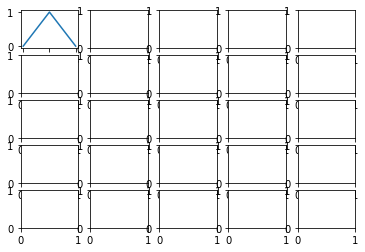

In [14]:
x = [1, 2, 3]
y = [0, 1, 0]

fig, ax = plt.subplots(5,5)
ax[0,0].plot(x,y)
#ax[0].plot(arrests_by_method.loc[arrests_by_method["aor"] == "ATL"])

## Citizenship Analysis

In [15]:
enc_cit = encounters.citizenship.value_counts(normalize=True).to_frame()
enc_cit.columns = ["encounters"]

In [16]:
arr_cit = arrests.citizenship.value_counts(normalize=True).to_frame()
arr_cit.columns = ["arrests"]

In [17]:
rem_cit = removals.citizenship.value_counts(normalize=True).to_frame()
rem_cit.columns = ["removals"]

In [18]:
#combined dataframe for enforcement by citizenship
df = pd.concat([enc_cit, arr_cit, rem_cit], axis=1)
df = df*100
df = df.round(decimals=2)
df = df.sort_values(by = ['removals'], ascending=False)
df = df.astype(str) + '%'
df

encounters arrests removals
MEXICO                    43.82%  60.11%   55.44%
GUATEMALA                  6.62%  10.66%   17.55%
HONDURAS                   5.53%   8.39%   11.49%
EL SALVADOR                4.89%   6.36%    7.43%
DOMINICAN REPUBLIC         2.78%   1.37%    0.79%
...                          ...     ...      ...
REUNION                     0.0%    nan%     nan%
SAO TOME AND PRINCIPE       0.0%    nan%     nan%
SOLOMON ISLANDS             0.0%    nan%     nan%
USSR                       0.07%   0.02%     nan%
VANUATU                     0.0%    nan%     nan%

[218 rows x 3 columns]

In [25]:
arrests['apprehension_method'].value_counts()

CAP Local Incarceration                        213952
CAP Federal Incarceration                       84535
Located                                         67259
Non-Custodial Arrest                            61416
CAP State Incarceration                         41238
287(g) Program                                  29012
ERO Reprocessed Arrest                          17803
Probation and Parole                            14873
Other efforts                                    5525
Law Enforcement Agency Response Unit             2562
Patrol Border                                    1674
Other Agency (turned over to INS)                1602
Inspections                                       712
Other Task Force                                  586
Worksite Enforcement                              544
Organized Crime Drug Enforcement Task Force       322
Anti-Smuggling                                    157
Patrol Interior                                    95
Traffic Check               

In [45]:
arrests_CAP = arrests[arrests['apprehension_method'].isin(['CAP Federal Incarceration', 'CAP State Incarceration', 'CAP Local Incarceration', 'Criminal Alien Program'])]
arrests_CAP['aor'].value_counts()
#arrests_CAP = arrests.loc[arrests['apprehension_method'] == ('CAP Federal Incarceration', 'CAP Local Incarceration')]
#arrests_CAP['citizenship'].value_counts()
#arrests_CAP.groupby(['apprehension_method'])['citizenship'].value_counts()

DAL    49312
HOU    45238
SNA    27086
NOL    24685
ATL    22735
LOS    18140
CHI    17243
PHO    17117
SFR    16827
MIA    13373
SLC    12901
SPM     9896
PHI     9487
WAS     9400
SND     6810
SEA     5968
DET     5722
NEW     5184
DEN     5011
ELP     4693
NYC     3901
BUF     3418
BOS     3113
BAL     1792
HQ        11
Name: aor, dtype: int64

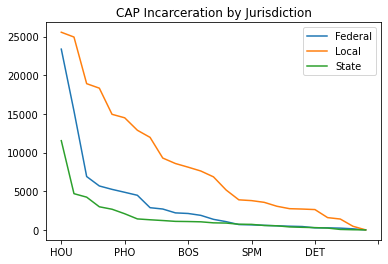

In [84]:
arrests_CAP = arrests[arrests['apprehension_method'].isin(['CAP Federal Incarceration'])]
arrests_CAP['aor'].value_counts().plot(label='Federal')
plt.title('CAP Incarceration by Jurisdiction')

arrests_CAP = arrests[arrests['apprehension_method'].isin(['CAP Local Incarceration'])]
arrests_CAP['aor'].value_counts().plot(label='Local')

arrests_CAP = arrests[arrests['apprehension_method'].isin(['CAP State Incarceration'])]
arrests_CAP['aor'].value_counts().plot(label='State')
plt.legend()

In [107]:
arrests_CAP = arrests[arrests['apprehension_method'].isin(['CAP Federal Incarceration', 'CAP State Incarceration', 'CAP Local Incarceration', 'Criminal Alien Program'])]
arrests_CAP['citizenship'].value_counts()

MEXICO                225345
GUATEMALA              28648
HONDURAS               26178
EL SALVADOR            18326
DOMINICAN REPUBLIC      4959
                       ...  
COMOROS                    0
ICELAND                    0
BAHRAIN                    0
TURKMENISTAN               0
ESWATINI                   0
Name: citizenship, Length: 207, dtype: int64

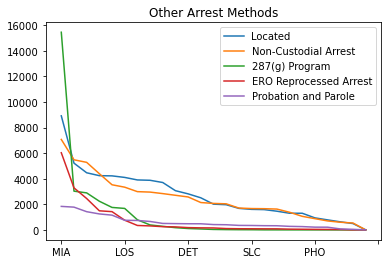

In [136]:
arrests_other = arrests[arrests['apprehension_method'].isin(['Located'])]
arrests_other['aor'].value_counts().plot(label='Located')
plt.title('Other Arrest Methods')

arrests_other = arrests[arrests['apprehension_method'].isin(['Non-Custodial Arrest'])]
arrests_other['aor'].value_counts().plot(label='Non-Custodial Arrest')

arrests_other = arrests[arrests['apprehension_method'].isin(['287(g) Program'])]
arrests_other['aor'].value_counts().plot(label='287(g) Program')

arrests_other = arrests[arrests['apprehension_method'].isin(['ERO Reprocessed Arrest'])]
arrests_other['aor'].value_counts().plot(label='ERO Reprocessed Arrest')

arrests_other = arrests[arrests['apprehension_method'].isin(['Probation and Parole'])]
arrests_other['aor'].value_counts().plot(label='Probation and Parole')

plt.legend()

## Landmarks

In [193]:
landmarks_df = encounters['landmark'].value_counts()

from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(landmarks_df).to_html())

In [10]:
encounters['non-specific'] = encounters['landmark'].str.contains('non-specific', case=False, na=False).astype(int)
#unique_non_specific = encounters.loc[encounters['non-specific'] == 1, ['landmark', 'aor', 'id']]
#unique_non_specific.groupby(['aor', 'landmark'], as_index=False)['id'].count()

unique_non_specific = encounters.loc[encounters['non-specific'] == 1]
unique_non_specific = unique_non_specific[['aor', 'landmark', 'non-specific']].groupby(['aor', 'landmark'], as_index=False).count()
unique_non_specific = unique_non_specific.loc[unique_non_specific['non-specific'] != 0]
unique_non_specific = unique_non_specific.sort_values(by=['aor', 'non-specific'], ascending = False)

from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(unique_non_specific).to_html())

In [306]:
len(set(unique_non_specific['landmark']))

256

### Encounters

In [186]:
encounter_landmarks_aor = encounters.loc[encounters["aor"] == "SEA", "landmark"].value_counts().to_frame()
encounter_landmarks_aor = encounter_landmarks_aor.loc[encounter_landmarks_aor["landmark"] > 0, :]
encounter_landmarks_aor

landmark
WASHINGTON COUNTY JAIL                          2390
CLARK COUNTY JAIL                               2187
 MULTNOMAH COUNTY JAILS (INVERNESS & MCDC)      2073
KING COUNTY JAIL                                1854
FRANKLIN CO. JAIL                               1774
...                                              ...
SHUTTER CREEK CORRECTIONAL FACILITY (SCCI)         1
MULTI-COUNTY JAIL                                  1
ECHO GLEN CHILDREN'S CENTER                        1
LVG GENERAL AREA, NON-SPECIFIC                     1
USBOP FCI-SCHUYLKILL                               1

[205 rows x 1 columns]

<AxesSubplot:ylabel='Frequency'>

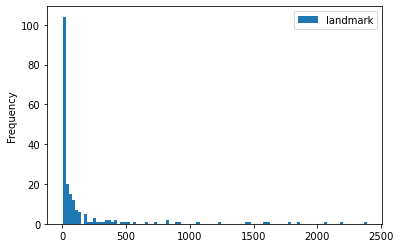

In [187]:
encounter_landmarks_aor.plot(kind='hist', bins=100)

In [65]:
fub = encounters[['aor','id', 'non-specific']]
fub = fub.groupby('aor')['non-specific'].sum()/fub.groupby('aor')['id'].count()
fub.sort_values(ascending=False)

aor
ATL    0.348916
WAS    0.341367
ELP    0.324316
CHI    0.317695
SNA    0.307817
SLC    0.285017
NOL    0.231434
PHI    0.220644
HOU    0.213086
LOS    0.184823
SFR    0.180508
DET    0.173404
HQ     0.142469
MIA    0.133180
SPM    0.119031
BOS    0.113580
DAL    0.092884
BAL    0.078346
PHO    0.070592
BUF    0.053056
SND    0.047127
NEW    0.036413
DEN    0.017890
NYC    0.010237
SEA    0.002965
dtype: float64

### Top ten encounters landmarks by AOR (aggregate)

/Users/lucasolson/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


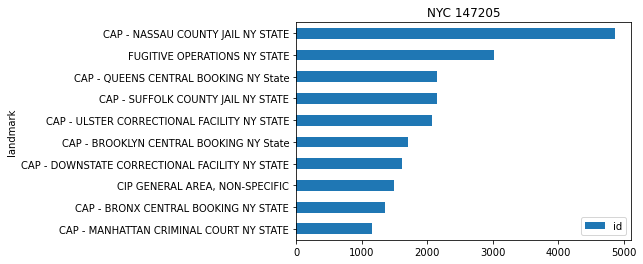

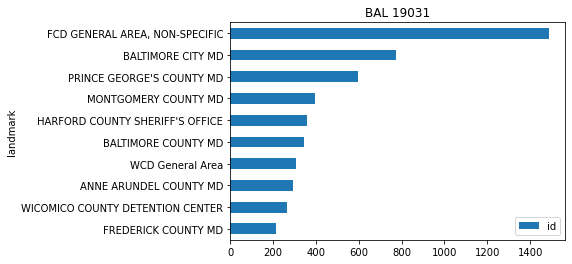

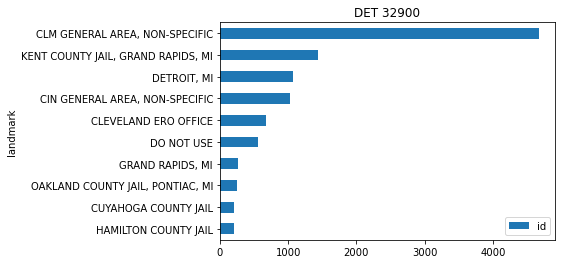

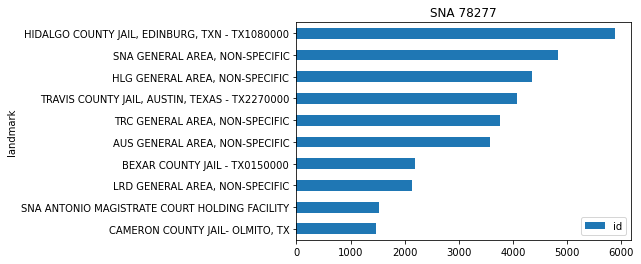

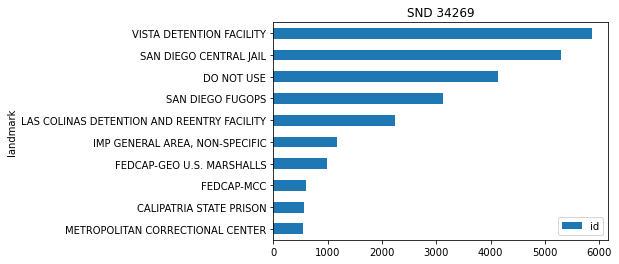

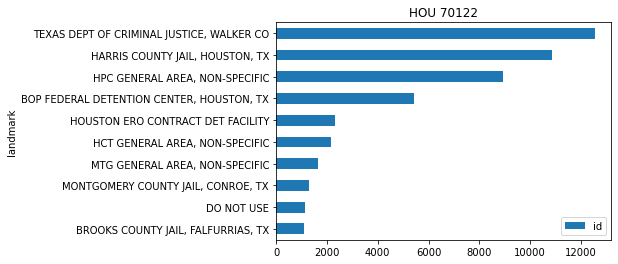

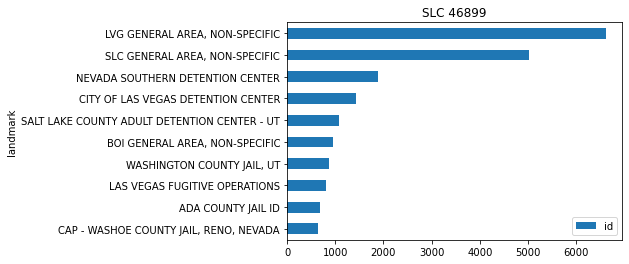

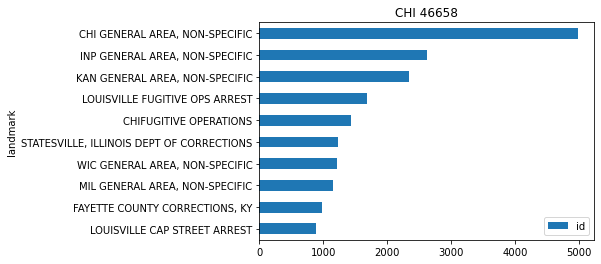

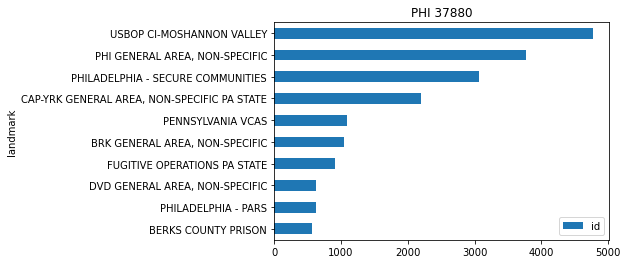

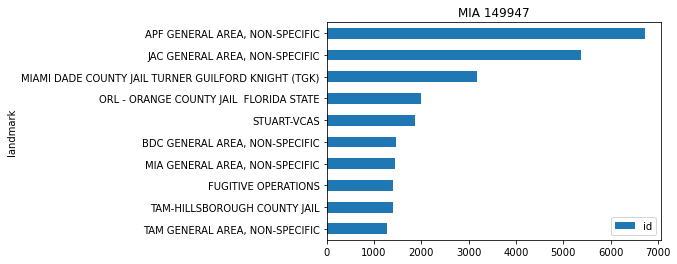

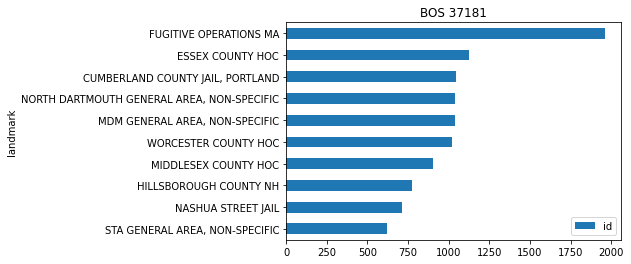

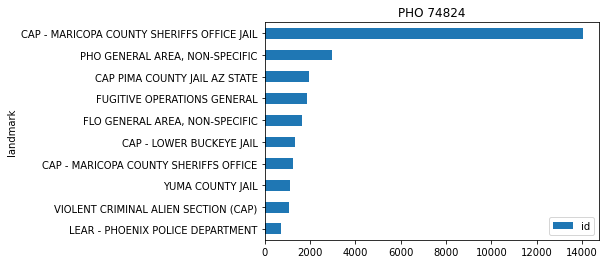

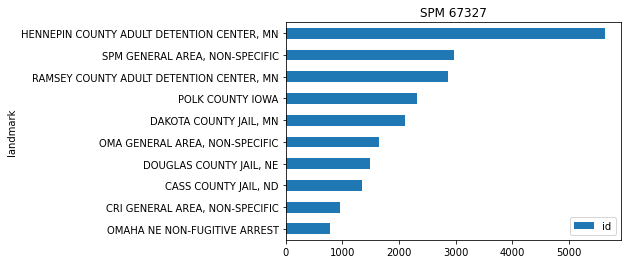

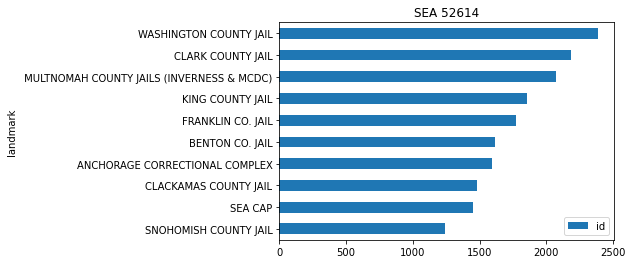

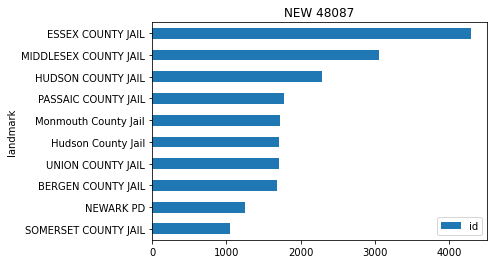

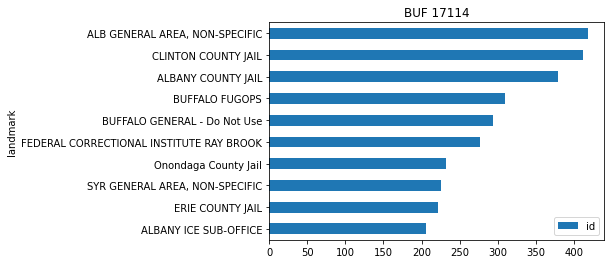

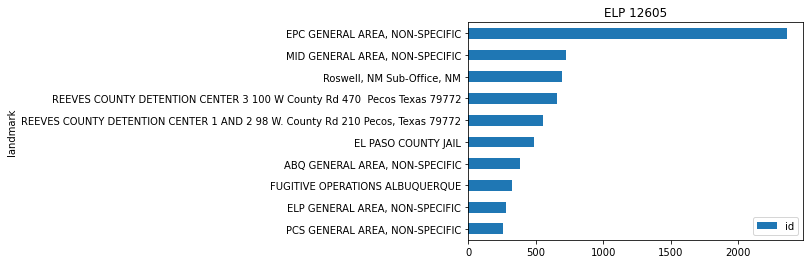

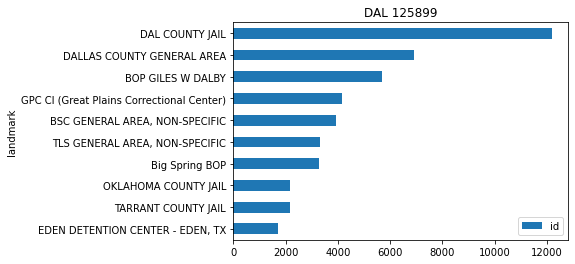

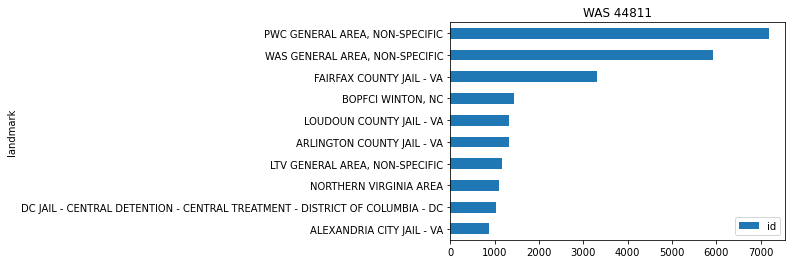

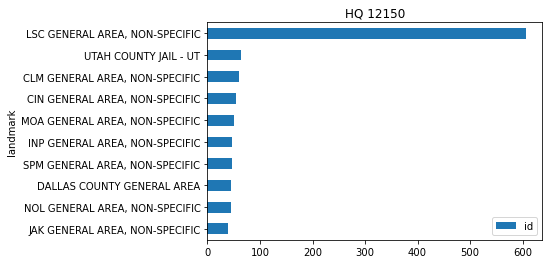

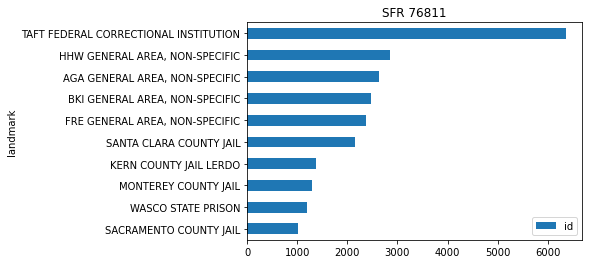

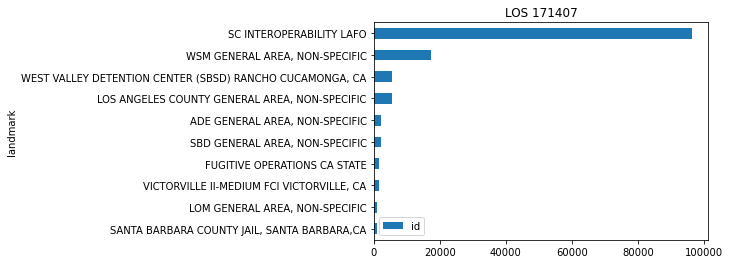

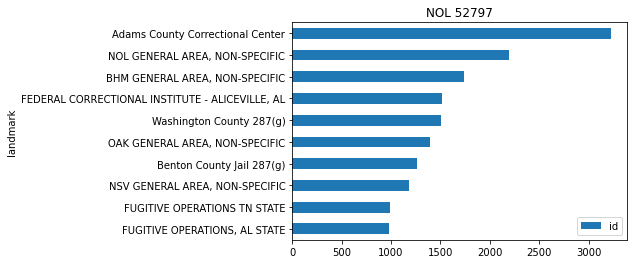

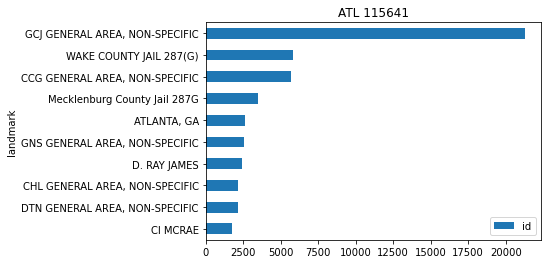

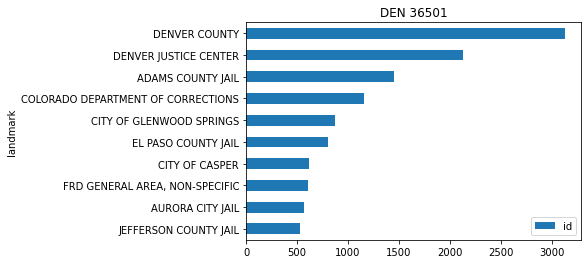

In [188]:
e = encounters.groupby(['aor', 'landmark'], as_index=False)['id'].count()
f = e.sort_values(['aor', 'id'], ascending=False).groupby('aor').head(10)

for i in set(f['aor']):
    f.loc[f['aor'] == i].plot(y='id', x='landmark', kind='barh').invert_yaxis()
    plt.title(i + " " + str(encounters.loc[encounters['aor'] == i]['id'].count()))

### Top ten encounters landmarks by AOR (proportion)

/Users/lucasolson/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


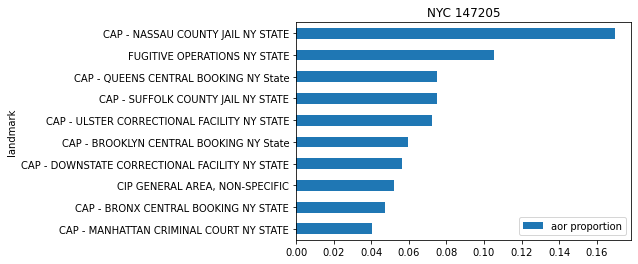

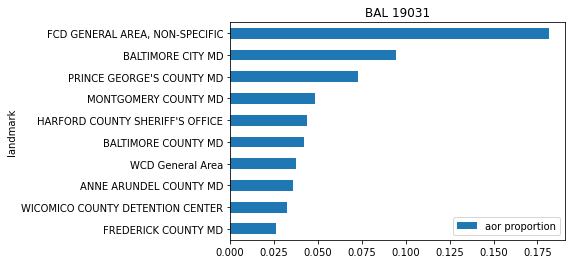

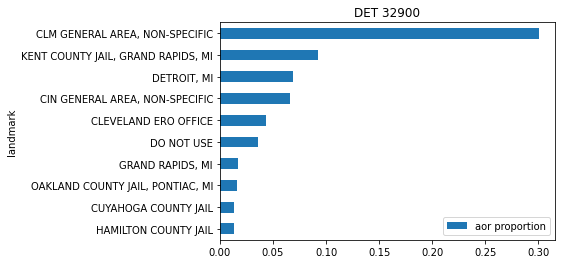

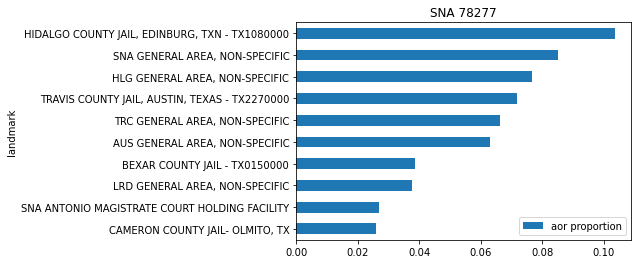

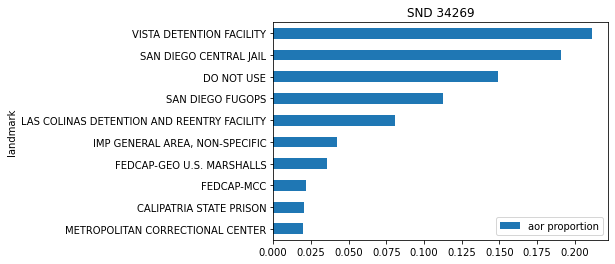

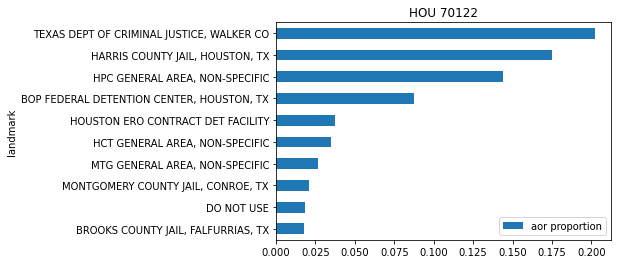

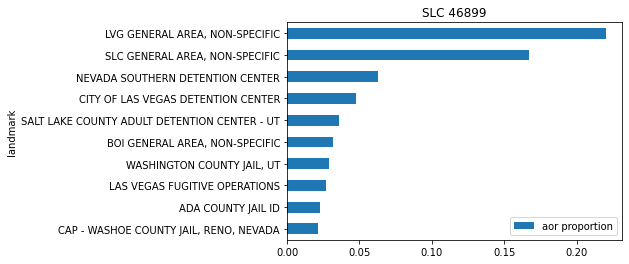

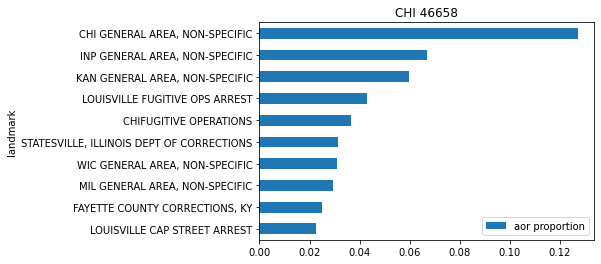

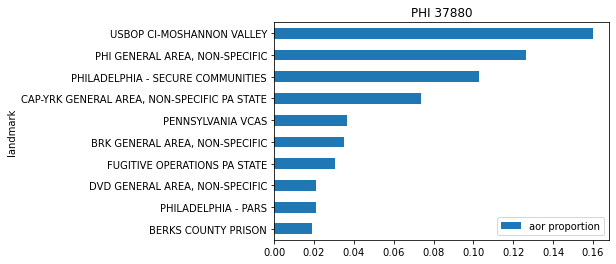

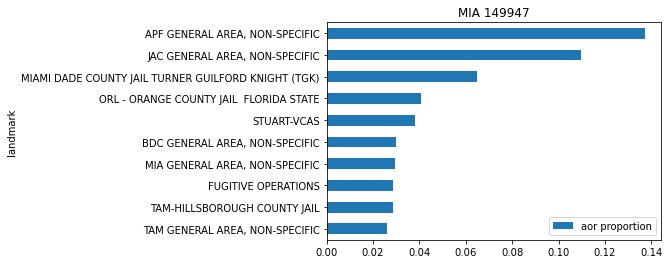

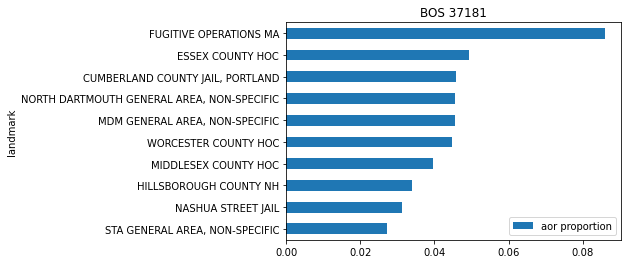

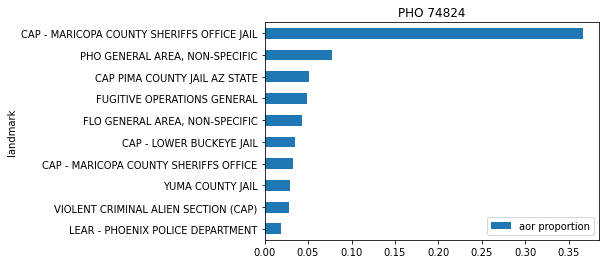

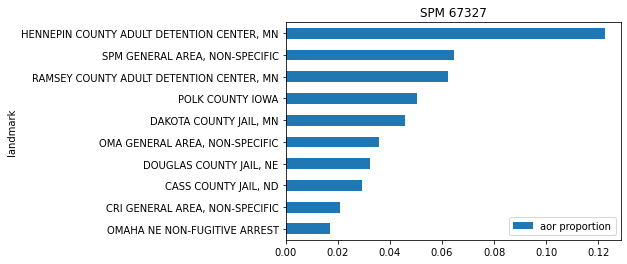

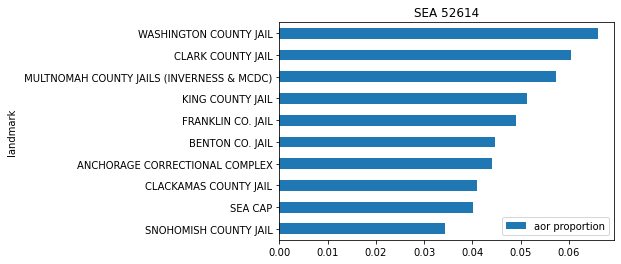

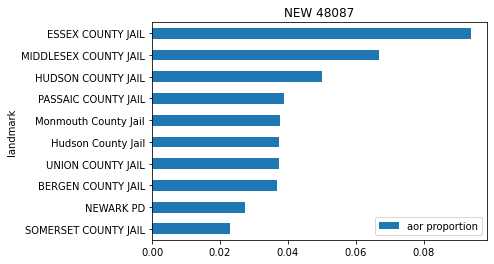

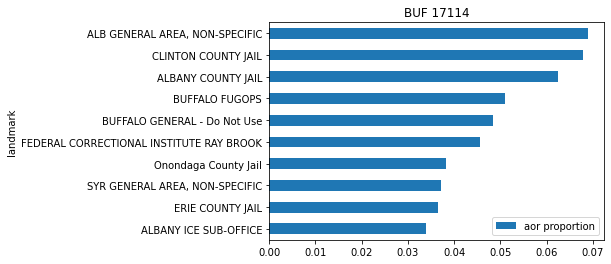

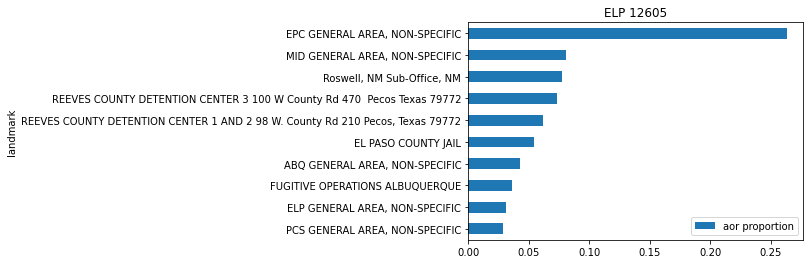

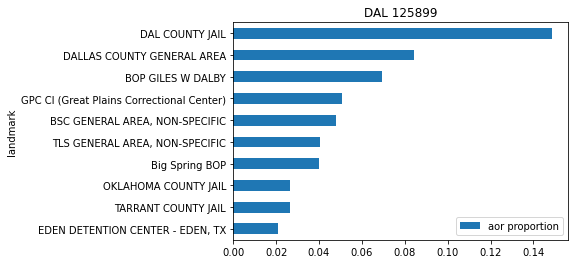

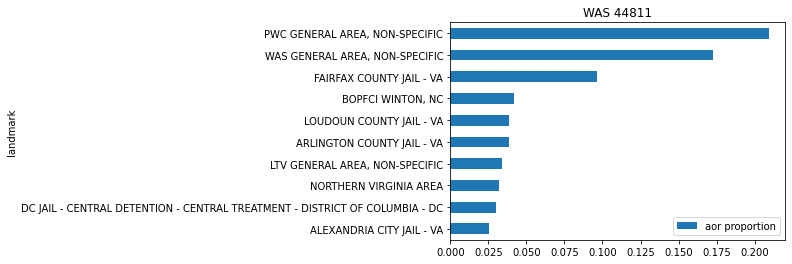

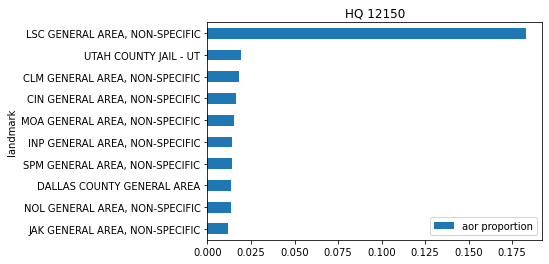

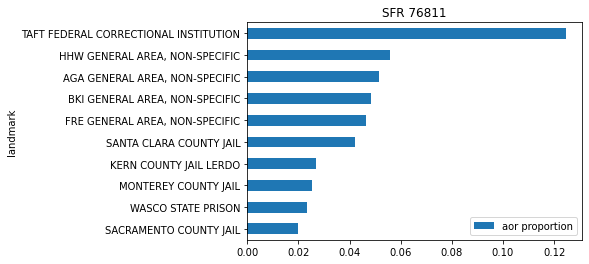

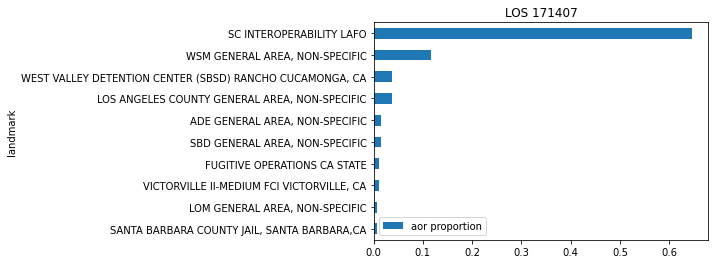

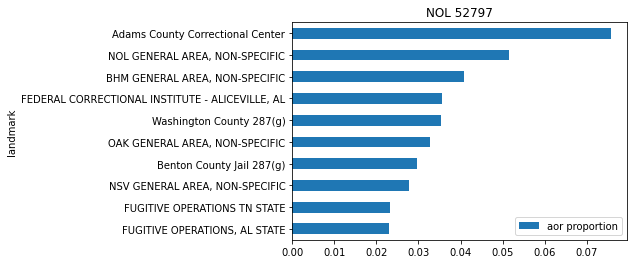

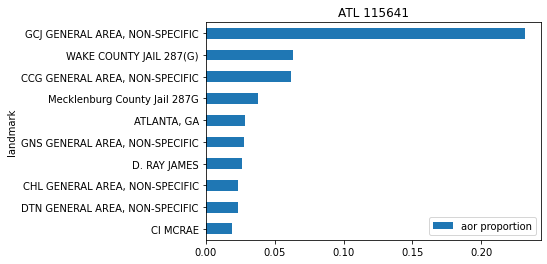

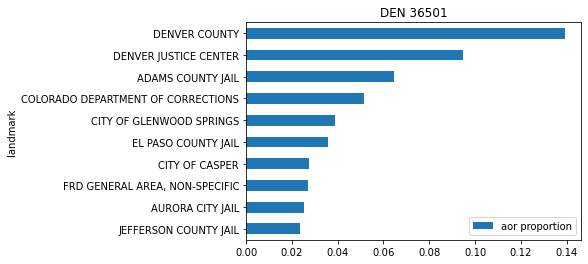

In [307]:
e['aor total'] = e.groupby('aor', sort=False)["id"].transform('sum')
e['aor proportion'] = e['id']/e['aor total']

g = e.sort_values(['aor', 'id'], ascending=False).groupby('aor').head(10)

for i in set(g['aor']):
    g.loc[g['aor'] == i].plot(y='aor proportion', x='landmark', kind='barh').invert_yaxis()
    plt.title(i + " " + str(encounters.loc[encounters['aor'] == i]['id'].count()))

### Arrests

In [19]:
arrests_landmarks = arrests.apprehension_landmark.str.upper().value_counts()
arrests_landmarks

TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO        10520
HARRIS COUNTY JAIL, HOUSTON, TX                   8697
LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC     8656
CAP - MARICOPA COUNTY SHERIFFS OFFICE JAIL        7539
DALLAS COUNTY GENERAL AREA                        7510
                                                 ...  
XSU GENERAL AREA, NON-SPECIFIC                       1
22ND DISTRICT COURT PROBATION, INKSTER               1
SAN LUIS CAP STREET ARREST                           1
XSF GENERAL AREA, NON-SPECIFIC                       1
BOSTON APPEALS COURT , CENTER PLAZA,                 1
Name: apprehension_landmark, Length: 7279, dtype: int64

<AxesSubplot:ylabel='Frequency'>

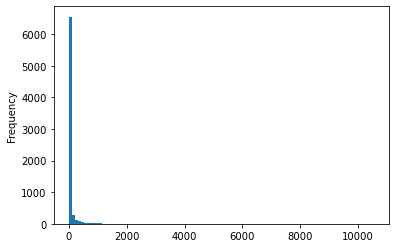

In [20]:
arrests_landmarks.plot(kind='hist', bins=100)

In [66]:
arrests['non-specific'] = arrests['apprehension_landmark'].str.contains('non-specific', case=False, na=False).astype(int)

dub = arrests[['aor','id', 'non-specific']]
dub = dub.groupby('aor')['non-specific'].sum()/dub.groupby('aor')['id'].count()
dub.sort_values(ascending=False)

aor
LOS    0.572502
SNA    0.476560
NOL    0.331825
SPM    0.309558
WAS    0.307616
SFR    0.305085
ELP    0.301610
CHI    0.290704
DET    0.288306
SLC    0.232862
PHI    0.228163
MIA    0.218077
HOU    0.197634
HQ     0.195122
NYC    0.127210
BOS    0.117373
DAL    0.083006
ATL    0.077616
BUF    0.069478
NEW    0.061397
SND    0.051527
DEN    0.044400
BAL    0.007241
SEA    0.001569
PHO    0.000696
dtype: float64

### Top ten arrests landmarks by AOR (aggregate)

/Users/lucasolson/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


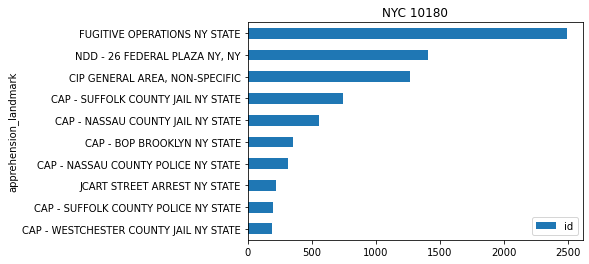

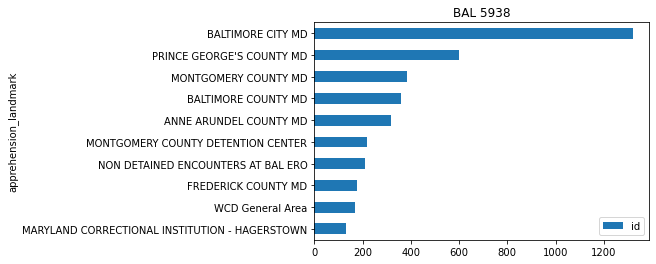

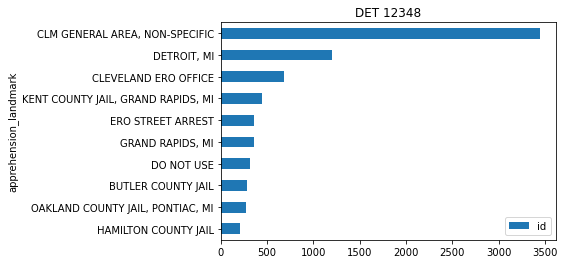

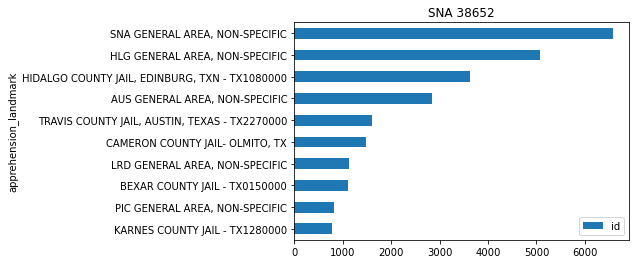

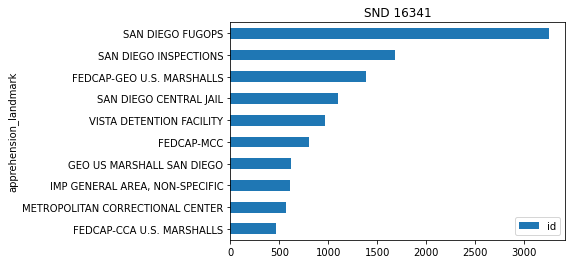

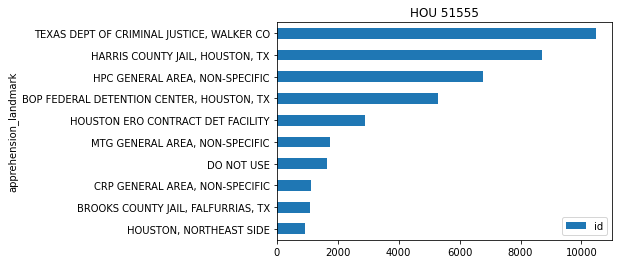

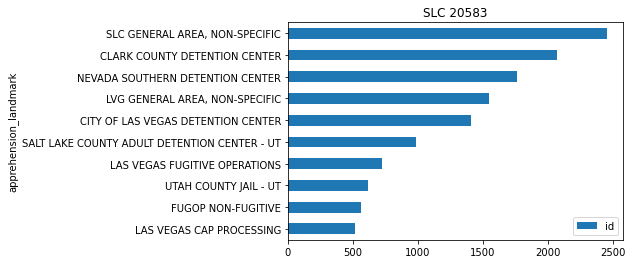

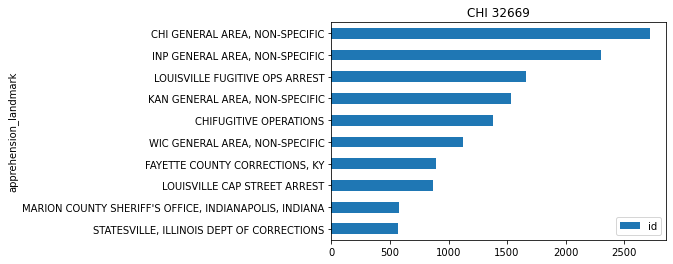

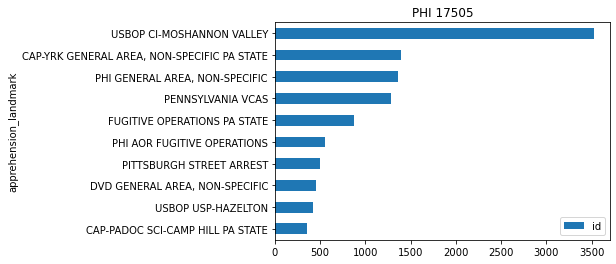

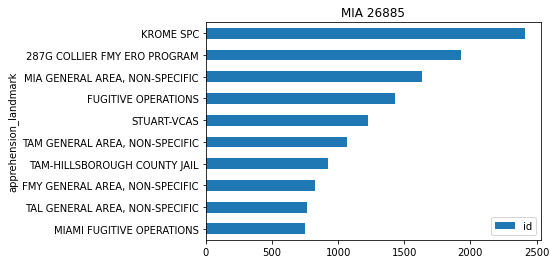

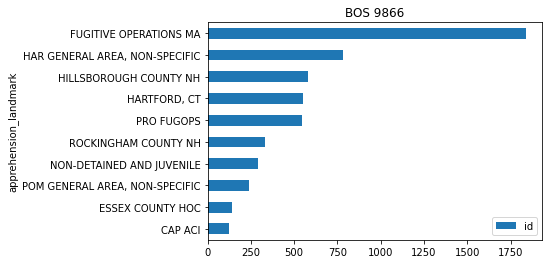

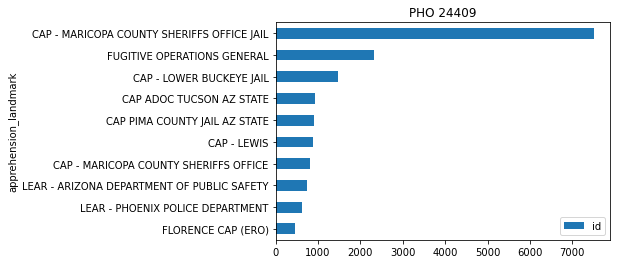

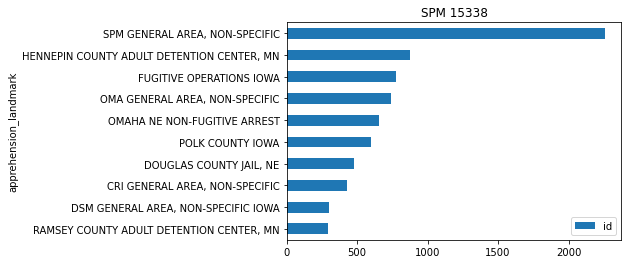

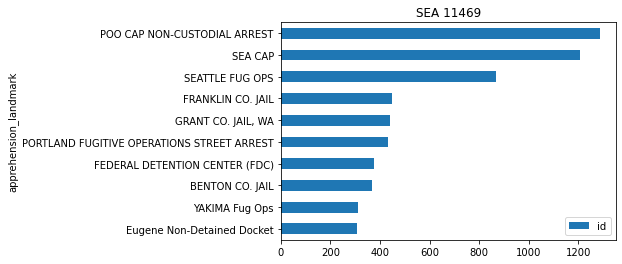

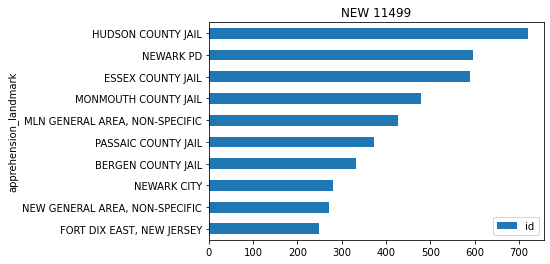

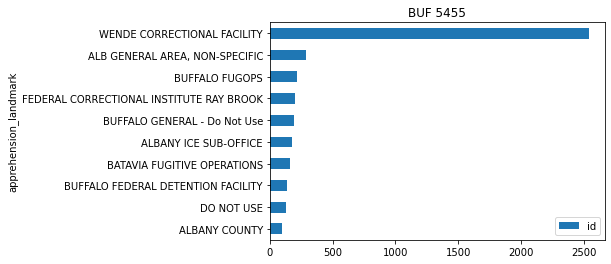

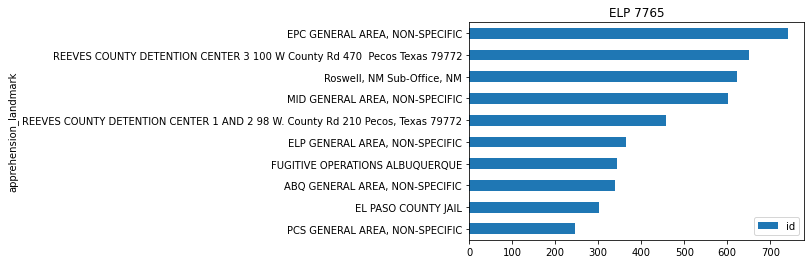

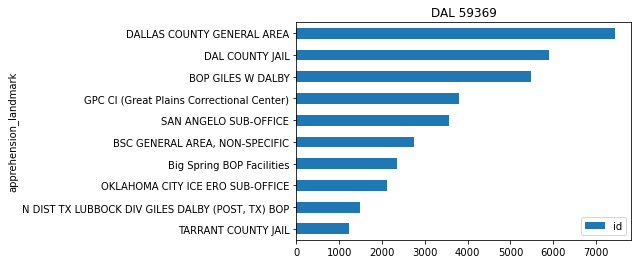

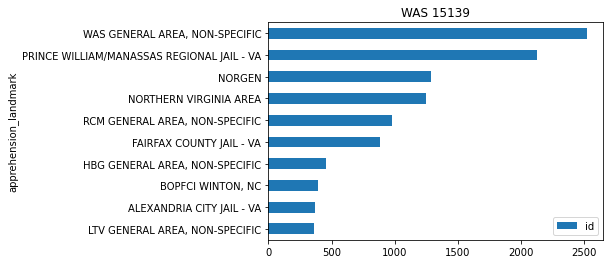

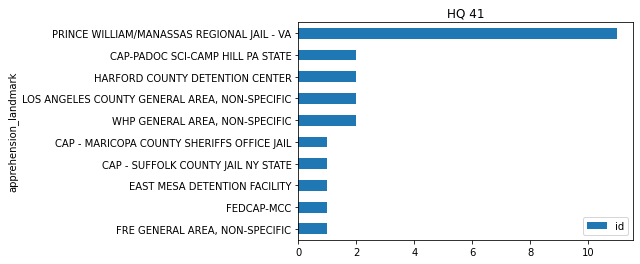

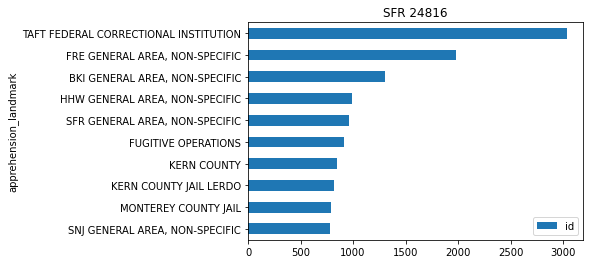

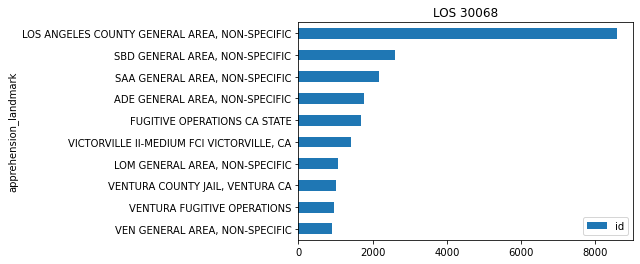

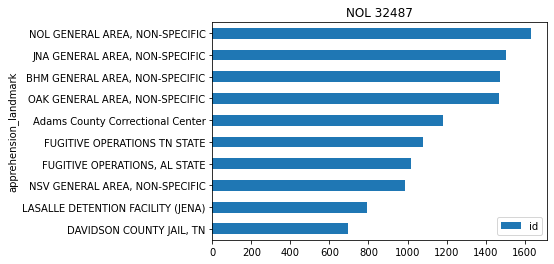

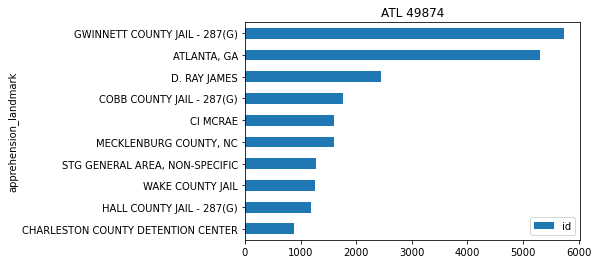

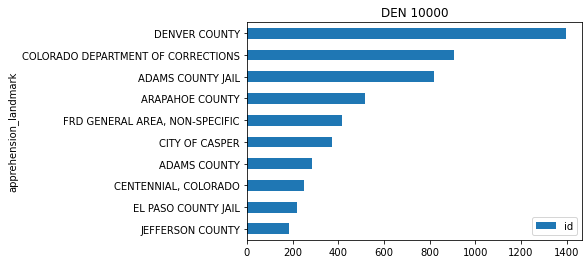

In [181]:
a = arrests.groupby(['aor', 'apprehension_landmark'], as_index=False)['id'].count()
b = a.sort_values(['aor', 'id'], ascending=False).groupby('aor').head(10)

for i in set(b['aor']):
    b.loc[b['aor'] == i].plot(y='id', x='apprehension_landmark', kind='barh').invert_yaxis()
    plt.title(i + " " + str(arrests.loc[arrests['aor'] == i]['id'].count()))

### Top ten arrests landmarks by AOR (proportions)

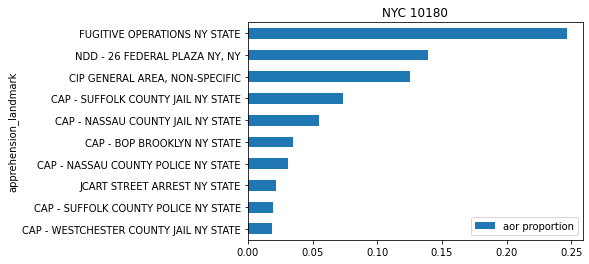

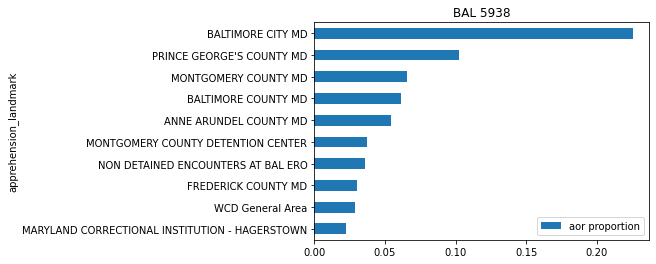

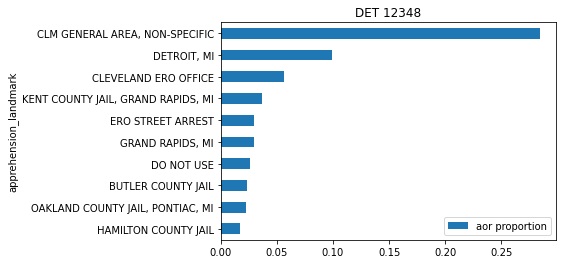

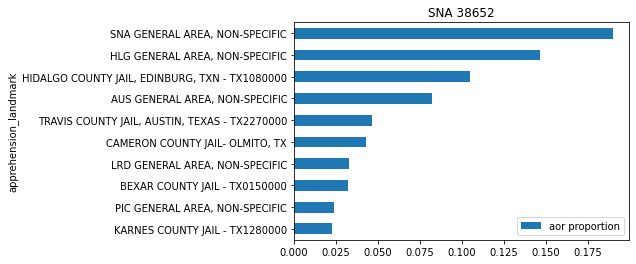

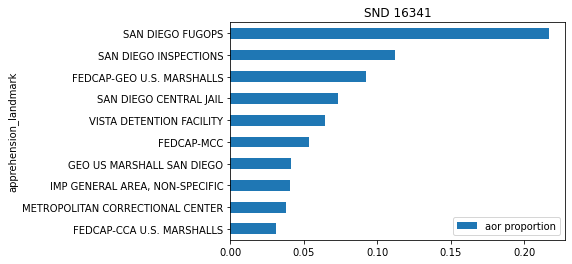

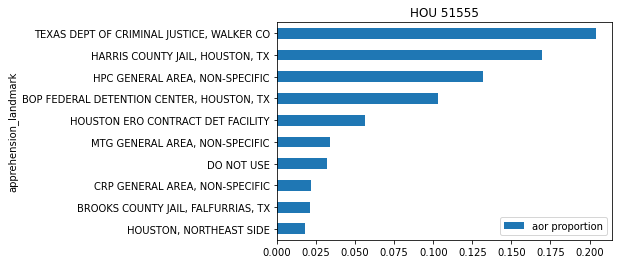

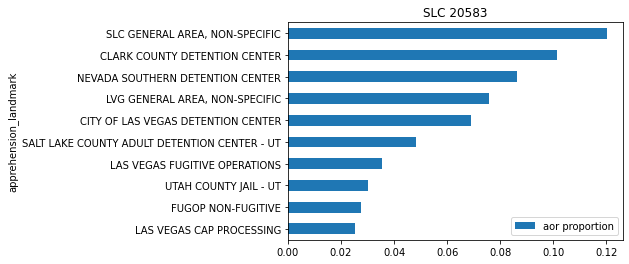

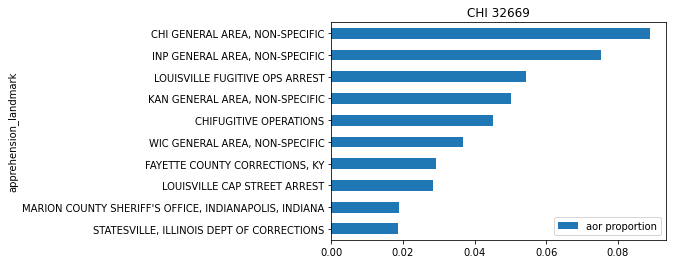

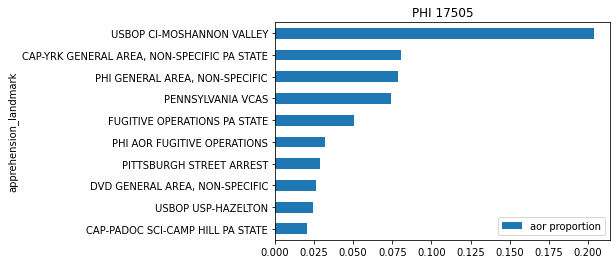

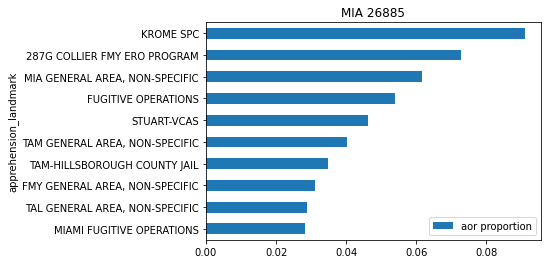

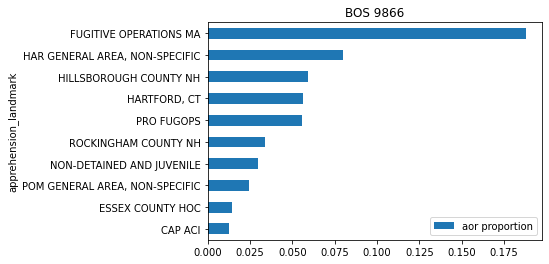

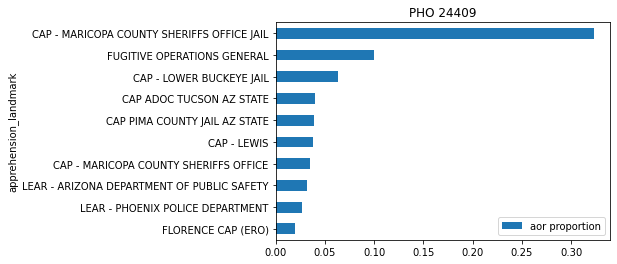

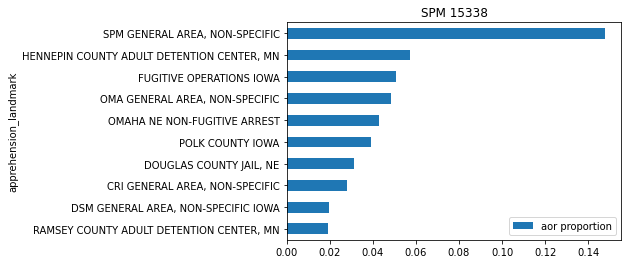

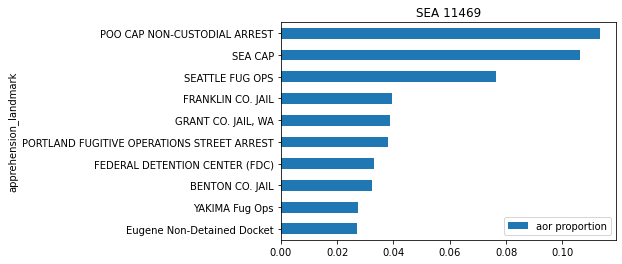

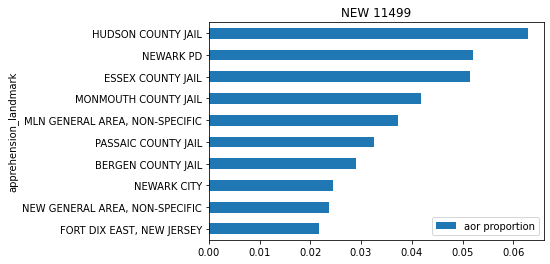

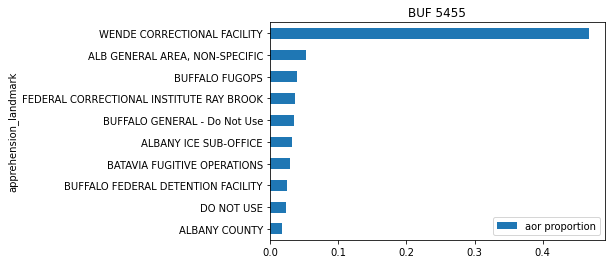

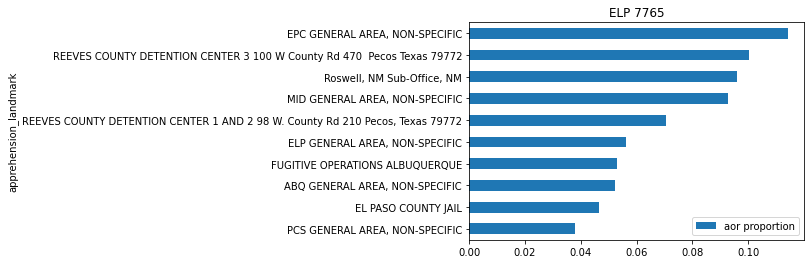

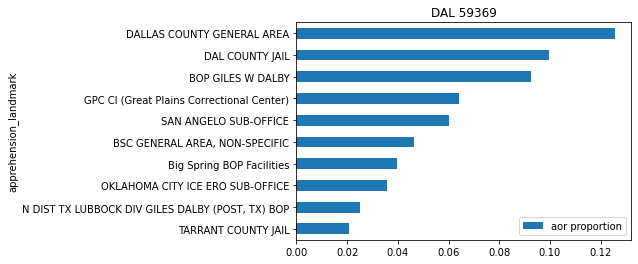

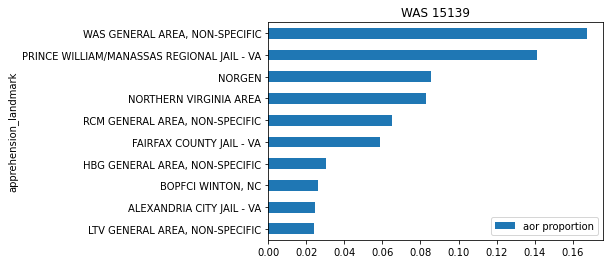

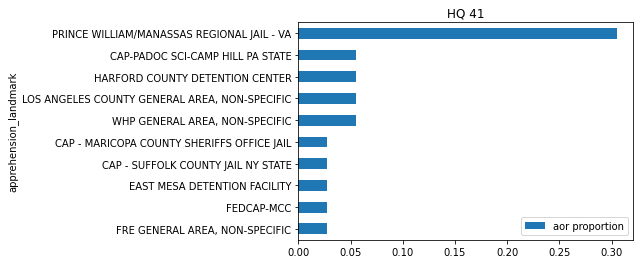

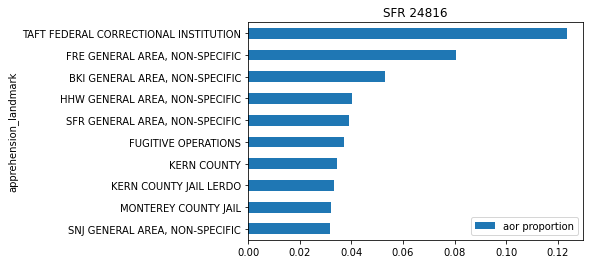

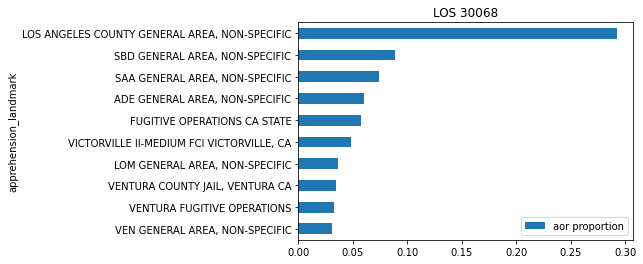

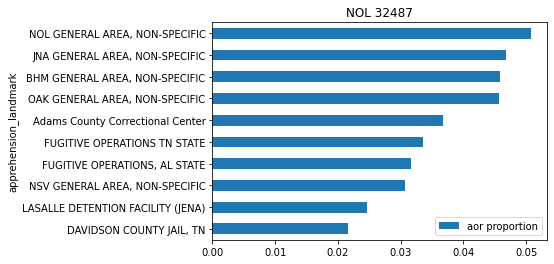

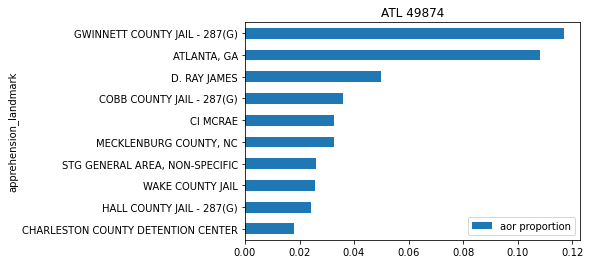

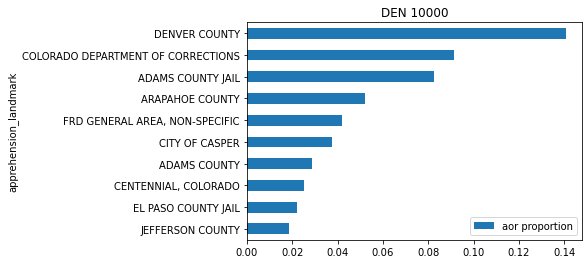

In [185]:
a['aor total'] = a.groupby('aor', sort=False)["id"].transform('sum')
a['aor proportion'] = a['id']/a['aor total']

c = a.sort_values(['aor', 'id'], ascending=False).groupby('aor').head(10)

for i in set(c['aor']):
    c.loc[c['aor'] == i].plot(y='aor proportion', x='apprehension_landmark', kind='barh').invert_yaxis()
    plt.title(i + " " + str(arrests.loc[arrests['aor'] == i]['id'].count()))

<AxesSubplot:ylabel='Frequency'>

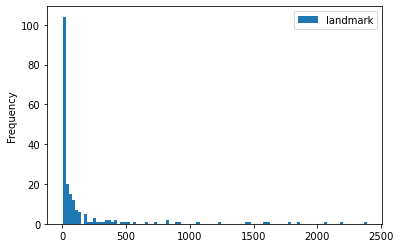

In [21]:
encounter_landmarks_aor.plot(kind='hist', bins=100)

# Previous Analysis

In [20]:
len(set(encounters.landmark.str.upper()))

8253

In [31]:
temp1 = encounters[['aor', 'landmark']].drop_duplicates(keep='first')

In [32]:
temp2 = arrests[['aor', 'apprehension_landmark']].drop_duplicates(keep='first')

In [37]:
temp2 = temp2.rename({'apprehension_landmark': 'landmark'}, axis=1)

In [40]:
aor_landmarks = pd.concat([temp1, temp2]).drop_duplicates(keep='first')

In [41]:
len(aor_landmarks)

12076

In [48]:
len(aor_landmarks.dropna(how='all'))

12075

In [21]:
len(set(arrests.apprehension_landmark.str.upper()))

7280

In [22]:
len(set(arrests.apprehension_landmark.str.upper()).union(set(encounters.landmark.str.upper())))

8961

In [23]:
sum(pd.isnull(arrests.apprehension_landmark)) / len(arrests) * 100

2.7281967580721944

In [24]:
sum(pd.isnull(encounters.landmark)) / len(encounters) * 100

39.06668608209649

Using date range of AIC report, numbers very close, difference either due to cleaning decisions or possibly records "back-filled" posterior to date of release to AIC.

In [13]:
aic_start = '2016-1-1'
aic_end = '2018-9-23'
print(len(arrests.set_index('apprehension_date').loc[aic_start: aic_end]))
print(len(encounters.set_index('event_date').loc[aic_start: aic_end]))
print(len(removals.set_index('removal_date').loc[aic_start: aic_end]))
print(len(removals.set_index('departed_date').loc[aic_start: aic_end]))

381705
1199704
656077
657686


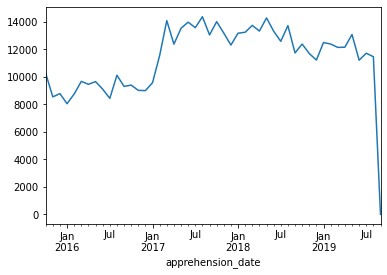

In [14]:
arrests.set_index('apprehension_date').resample('M')['id'].count().plot()

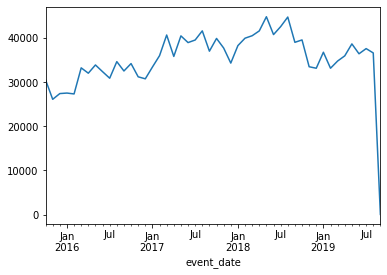

In [15]:
encounters.set_index('event_date').resample('M')['id'].count().plot()

<AxesSubplot:xlabel='departed_date'>

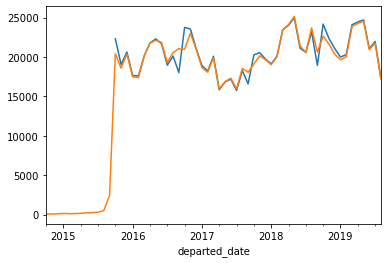

In [16]:
# Relationship between `removal_date` and `departed_date`. Strange.
removals.set_index('removal_date').resample('M')['id'].count().plot()
removals.set_index('departed_date').resample('M')['id'].count().plot()

In [24]:
facil_adp = pd.read_csv('../input/facility_adp_by_fy.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../input/facility_adp_by_fy.csv'

In [18]:
facil_adp.tail()

ATL  BAL  BOS  BUF   CHI   DAL  DEN   DET   ELP   HOU  ...   NYC  \
fy14_adp  2156  299  580  538  1481  1002  491   537  2167  3873  ...   991   
fy15_adp  1798  247  418  454  1116   795  426   346  2011  2324  ...   962   
fy16_adp  2110  264  555  608  1436   921  493   529  2469  3269  ...  1393   
fy17_adp  3232  289  670  641  1602   979  721   850  3094  3248  ...  1501   
fy18_adp  3501  326  768  633  1625  1153  649  1116  2561  2674  ...  1707   

           PHI   PHO   SEA   SFR  SLC   SNA   SND  SPM  WAS  
fy14_adp  1042  3317  1520   743  484  6972  1158  440  784  
fy15_adp   894  2868  1248   687  415  6163  1370  311  715  
fy16_adp  1019  4006  1540   969  556  7940  1610  432  763  
fy17_adp  1083  3724  1574   961  506  7212  1789  660  883  
fy18_adp  1088  3715  1531  1048  485  8407  1787  803  899  

[5 rows x 24 columns]

In [19]:
t = ['2008-10-01',
'2009-10-01',
'2010-10-01',
'2011-10-01',
'2012-10-01',
'2013-10-01',
'2014-10-01',
'2015-10-01',
'2016-10-01',
'2017-10-01']

In [20]:
facil_adp.index = t
facil_adp.index = pd.to_datetime(facil_adp.index)

In [21]:
# Percent change in ADP FY16-FY17, FY17-18
aor_facil_change_16_17 = (facil_adp.T['2016-10-01'] - facil_adp.T['2015-10-01']) / facil_adp.T['2015-10-01'] * 100
aor_facil_change_17_18 = (facil_adp.T['2017-10-01'] - facil_adp.T['2016-10-01']) / facil_adp.T['2016-10-01'] * 100

In [22]:
# Total ADP % change FY16-FY18
total_facil_change = (facil_adp.T['2017-10-01'].sum() - facil_adp.T['2015-10-01'].sum()) / facil_adp.T['2015-10-01'].sum() * 100
total_facil_change

10.04292898319637

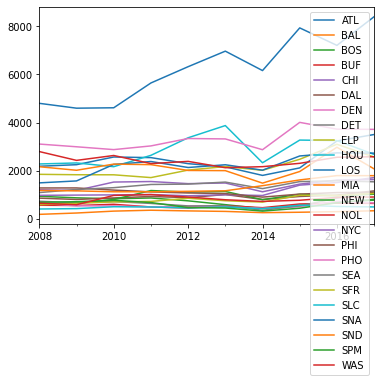

In [24]:
facil_adp.plot(stacked=False, legend=True)

In [25]:
facil_adp.mean().sort_values(ascending=False)

SNA    6267.6
PHO    3295.5
HOU    2813.9
ATL    2461.0
NOL    2422.3
LOS    2213.7
ELP    2152.0
MIA    2116.1
CHI    1415.3
SEA    1385.2
SND    1340.8
NYC    1143.8
PHI    1104.2
NEW     921.0
DAL     914.9
WAS     811.6
SFR     788.0
BOS     720.6
DET     662.8
SPM     591.7
BUF     549.3
DEN     547.7
SLC     468.1
BAL     281.2
dtype: float64

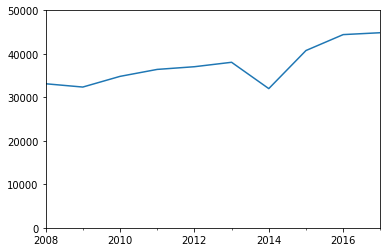

In [26]:
facil_adp.T.sum().plot(ylim=(0,50000))

In [27]:
facil_adp_subset = facil_adp.loc['2015':'2017']

In [10]:
arrests_by_aor_fy = arrests.set_index('apprehension_date').groupby([pd.Grouper(freq='AS-OCT'), 'aor'])['id'].count()
arrests_by_aor_fy

apprehension_date  aor
2015-10-01         ATL     8866
                   BAL     1239
                   BOS     1858
                   BUF     1173
                   CHI     7055
                          ...  
2018-10-01         SLC     5014
                   SNA    10968
                   SND     2107
                   SPM     4005
                   WAS     3734
Name: id, Length: 100, dtype: int64

In [29]:
arrests_by_aor_fy = arrests_by_aor_fy.unstack()

In [30]:
arrests_by_aor_fy_subset = arrests_by_aor_fy.loc['2015':'2017']

In [31]:
facil_adp_subset.index = ['FY16 ADP',
                          'FY17 ADP',
                          'FY18 ADP']

In [32]:
arrests_by_aor_fy_subset.index = ['FY16 Arrests',
                          'FY17 Arrests',
                          'FY18 Arrests']

In [33]:
data = facil_adp_subset.T.join(arrests_by_aor_fy_subset.T)

In [34]:
fys = ['FY16',
       'FY17',
       'FY18']

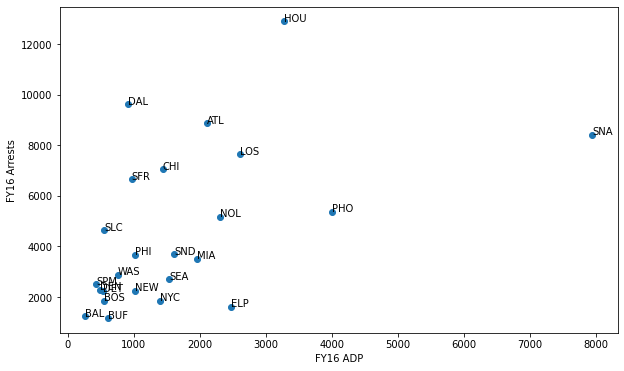

In [35]:
x=f'FY16 ADP'
y=f'FY16 Arrests'

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=x, y=y, data=data)
plt.xlabel(x)
plt.ylabel(y)

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data[x][i], data[y][i]))

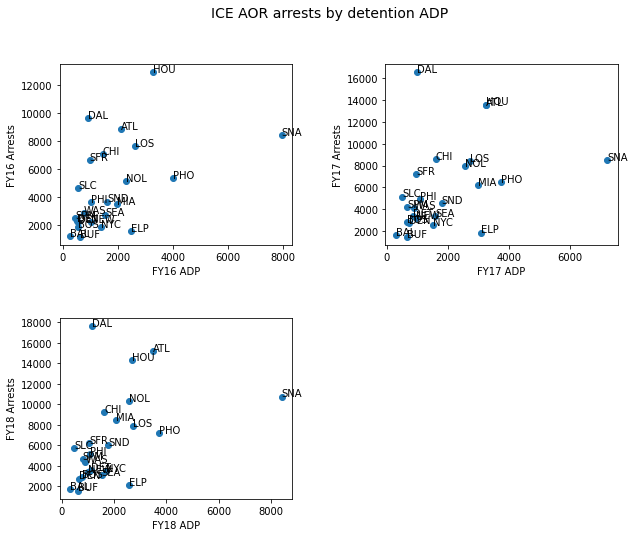

In [39]:
fig = plt.figure(figsize=(10,8))
i = 0

for fy in fys:
    x=f'{fy} ADP'
    y=f'{fy} Arrests'

    ax=plt.subplot(2,2,i+1)
    ax.scatter(x=x, y=y, data=data)
    plt.xlabel(x)
    plt.ylabel(y)
#     plt.ylim(-100, 20000)
#     plt.xlim(-100, 10000)

    i = i+1
    for j, txt in enumerate(data.index):
        plt.annotate(txt, (data[x][j], data[y][j]))

plt.suptitle(f'ICE AOR arrests by detention ADP', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [40]:
aor_arrest_change_16_17 = (arrests_by_aor_fy.T['2016-10-01'] - arrests_by_aor_fy.T['2015-10-01']) / arrests_by_aor_fy.T['2015-10-01'] * 100
aor_arrest_change_17_18 = (arrests_by_aor_fy.T['2017-10-01'] - arrests_by_aor_fy.T['2016-10-01']) / arrests_by_aor_fy.T['2016-10-01'] * 100

In [41]:
aor_arrest_change_16_17 = aor_arrest_change_16_17.drop('HQ')
aor_arrest_change_17_18 = aor_arrest_change_17_18.drop('HQ')

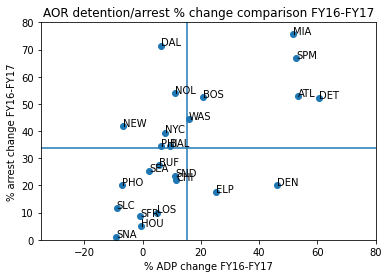

In [42]:
txt = list(aor_arrest_change_16_17.index)
x = list(aor_facil_change_16_17)
y = list(aor_arrest_change_16_17)
names = list(aor_arrest_change_16_17.index)

plt.scatter(x=x, y=y)
plt.xlabel('% ADP change FY16-FY17')
plt.ylabel('% arrest change FY16-FY17')
plt.title('AOR detention/arrest % change comparison FY16-FY17')
plt.axhline(aor_arrest_change_16_17.mean())
plt.axvline(aor_facil_change_16_17.mean())
plt.ylim(-0, 80)
plt.xlim(-35, 80)

for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]))

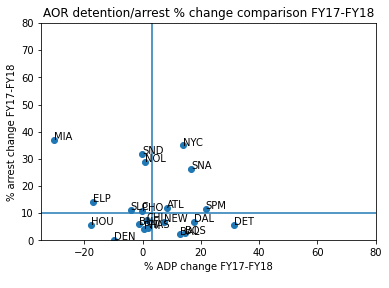

In [43]:
txt = list(aor_arrest_change_17_18.index)
x = list(aor_facil_change_17_18)
y = list(aor_arrest_change_17_18)
names = list(aor_arrest_change_17_18.index)

plt.scatter(x=x, y=y)
plt.xlabel('% ADP change FY17-FY18')
plt.ylabel('% arrest change FY17-FY18')
plt.title('AOR detention/arrest % change comparison FY17-FY18')
plt.axhline(aor_arrest_change_17_18.mean())
plt.axvline(aor_facil_change_17_18.mean())
plt.ylim(-0, 80)
plt.xlim(-35, 80)

for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]))

In [46]:
removals.columns

Index(['aor', 'apprehension_date', 'processing_disposition_code',
       'citizenship', 'gender', 'rc_threat_level', 'final_charge_section',
       'departed_date', 'removal_date', 'id'],
      dtype='object')

In [47]:
removals['removal_date'] = pd.to_datetime(removals['removal_date'])

# removals['apprehension_date'] = pd.to_datetime(removals['apprehension_date'])
# removals['departed_date'] = pd.to_datetime(removals['departed_date'])

In [48]:
g = removals.set_index('removal_date').groupby([pd.Grouper(freq='AS-OCT'), 'citizenship'])

In [49]:
data = g['id'].count().unstack()

In [50]:
data_change = (data.T['2017-10-01'] - data.T['2015-10-01']) / data.T['2015-10-01'] * 100

In [51]:
data_change = data_change.replace([np.inf, -np.inf], np.nan)
data_change = data_change.dropna()

In [52]:
data_change.sort_values()

citizenship
SWAZILAND         -100.00
SEYCHELLES        -100.00
CAYMAN ISLANDS    -100.00
ANGUILLA          -100.00
OMAN              -100.00
                   ...   
GUINEA            1268.75
AZERBAIJAN        1300.00
SUDAN             1300.00
GAMBIA            5450.00
SOUTH SUDAN       6000.00
Length: 186, dtype: float64

In [53]:
data_change.loc['SOMALIA']

15.656565656565657